In [1]:
#Libraries import

import os
import requests
import json
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Covid data import using API

resp = requests.get("https://api.covidtracking.com/v1/us/daily.json")
data = resp.text
corona_df = pd.read_json(data)

#Data cleanup
covid_df = corona_df[["date","positive", "negative", "hospitalizedCumulative","death"]]
covid_df.dropna(inplace=True)


#Change format of data column
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%Y%m%d')

covid_df=covid_df.sort_values('date').set_index('date')

#create two dataframes for march month and from april months

march_df = covid_df['2020-03-01':'2020-03-31']
from_april  = covid_df['2020-04-01':]
from_april.tail()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


positive   negative  hospitalizedCumulative     death
date                                                             
2020-10-05   7421973   97210380                415085.0  202041.0
2020-10-06   7460634   97932855                414461.0  202675.0
2020-10-07   7511236   98665547                416711.0  203591.0
2020-10-08   7566106   99541032                418763.0  204566.0
2020-10-09   7623648  100497078                420587.0  205470.0

In [3]:
# Import ETF data from Yahoo Finance with specific start and end dates

# create two dataframes for msrch month and from april month

etf_march_df = yf.download(['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
etf_march_df = etf_march_df['Close']
etf_march_df.head()



etf_fromapril_df = yf.download(['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
etf_fromapril_df = etf_fromapril_df['Close']
etf_fromapril_df.head()

SPY        XLB        XLC        XLE        XLF        XLI  \
Date                                                                            
2020-04-01  246.149994  43.009998  42.480000  27.620001  19.549999  56.349998   
2020-04-02  251.830002  43.660000  43.020000  30.150000  20.040001  57.099998   
2020-04-03  248.190002  42.610001  42.150002  29.830000  19.639999  56.340000   
2020-04-06  264.859985  45.779999  44.930000  31.410000  21.049999  60.240002   
2020-04-07  265.130005  47.000000  45.259998  32.080002  21.260000  60.099998   

                  XLK        XLP       XLRE        XLU        XLV         XLY  
Date                                                                           
2020-04-01  76.540001  53.549999  29.120001  52.080002  85.209999   93.699997  
2020-04-02  78.330002  54.919998  29.549999  53.709999  87.570000   94.050003  
2020-04-03  77.120003  55.349998  29.299999  51.790001  86.779999   92.410004  
2020-04-06  83.699997  57.410000  31.420000  55.790001  91.330002  100.099998  
2020-04-07  82.949997  56.750000  31.430000  55.090000  90.580002  101.589996

## Market Comparison

### Market comparison March

In [4]:
#Set the dataframe for market comparison

market_comparison = etf_march_df
market_comparison.head()

SPY        XLB        XLC        XLE        XLF        XLI  \
Date                                                                            
2020-03-02  309.089996  54.980000  52.520000  47.099998  27.950001  75.650002   
2020-03-03  300.239990  54.500000  50.790001  45.660000  26.900000  73.800003   
2020-03-04  312.859985  56.759998  52.619999  46.740002  27.790001  76.849998   
2020-03-05  302.459991  54.959999  50.700001  45.029999  26.450001  73.089996   
2020-03-06  297.459991  53.529999  49.820000  42.500000  25.549999  72.449997   

                  XLK        XLP       XLRE        XLU        XLV         XLY  
Date                                                                           
2020-03-02  93.480003  61.090000  38.619999  65.839996  96.949997  119.809998  
2020-03-03  89.930000  60.259998  38.590000  65.029999  94.540001  116.910004  
2020-03-04  93.790001  63.220001  40.090000  68.720001  99.989998  120.949997  
2020-03-05  90.830002  62.029999  39.169998  67.660004  97.669998  116.440002  
2020-03-06  88.910004  61.540001  38.500000  67.110001  97.150002  114.650002

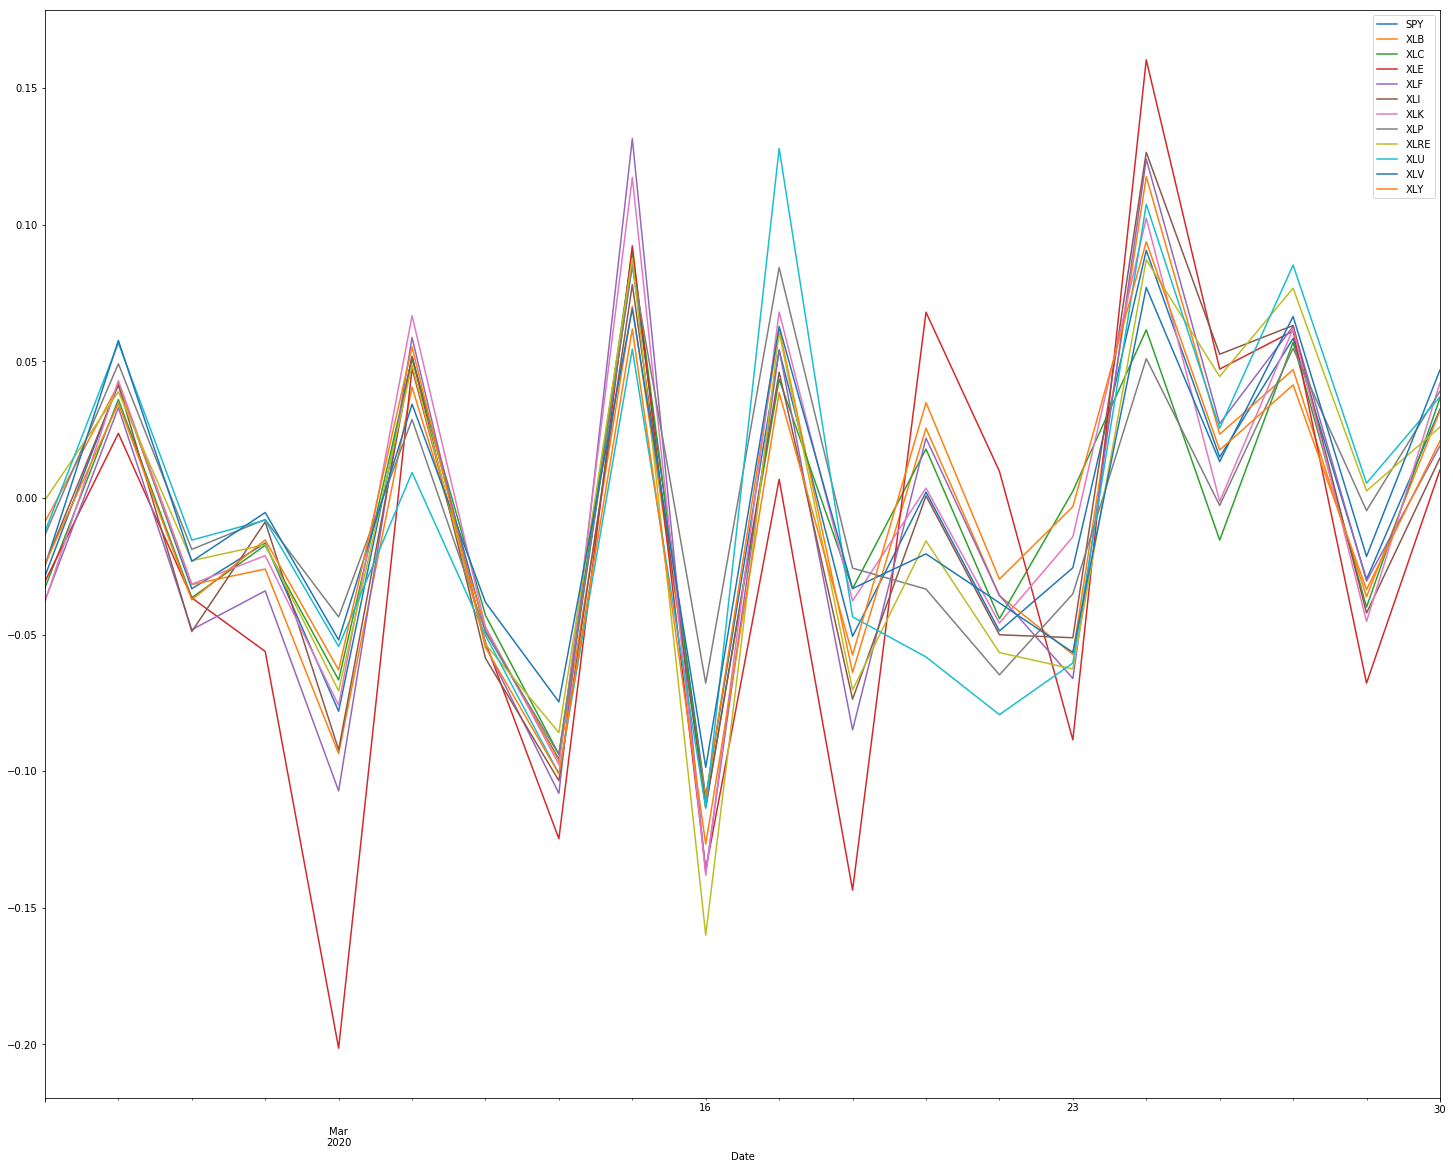

In [5]:
#calculate daily change and plot the same

change_comparison=market_comparison.pct_change()
change_comparison.dropna(inplace=True)
change_comparison.plot(figsize = (25,20))

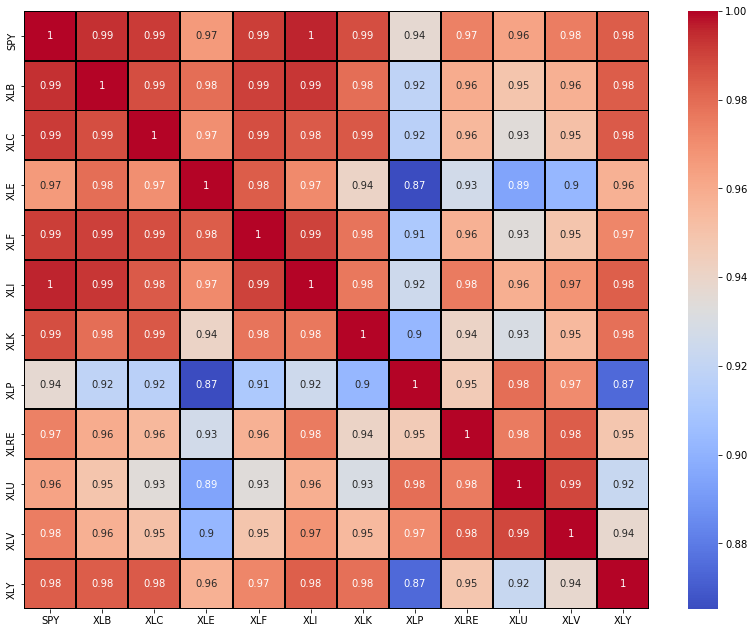

In [6]:
#plot correlations among all the ETFs

fig, ax = plt.subplots(figsize=(14,11))
sns.heatmap(market_comparison.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

Technology sector ETF and energy sector ETF are the only ones negatively correlated. Rest all are positively correlated to some extent.

In [7]:
#calculate beta for a 7 day rolling window and plot

def beta(ticker1, ticker2, window_size,df):
    covariance = df[ticker1].rolling(window=window_size).cov(df[ticker2])
    variance = df[ticker1].rolling(window=window_size).var()
    return covariance / variance

XLB_beta = beta('XLB','SPY',7,market_comparison)
XLC_beta = beta('XLC','SPY',7,market_comparison)
XLE_beta = beta('XLE','SPY',7,market_comparison)
XLF_beta = beta('XLF','SPY',7,market_comparison)
XLY_beta = beta('XLY','SPY',7,market_comparison)
XLP_beta = beta('XLP','SPY',7,market_comparison)
XLV_beta = beta('XLV','SPY',7,market_comparison)
XLI_beta = beta('XLI','SPY',7,market_comparison)
XLRE_beta = beta('XLRE','SPY',7,market_comparison)
XLK_beta = beta('XLK','SPY',7,market_comparison)
XLU_beta = beta('XLU','SPY',7,market_comparison)

In [8]:
XLB_beta.hvplot(label = "XLB") * XLC_beta.hvplot(label = "XLC") *  XLE_beta.hvplot(label = "XLE") * XLF_beta.hvplot(label = "XLF") *XLY_beta.hvplot(label = "XLY") * XLP_beta.hvplot(label = "XLP") * XLV_beta.hvplot(label = "XLV") * XLI_beta.hvplot(label = "XLI") * XLRE_beta.hvplot(label = "XLRE") * XLK_beta.hvplot(label = "XLK") * XLU_beta.hvplot(label = "XLU")

:Overlay
   .Curve.XLB  :Curve   [Date]   (0)
   .Curve.XLC  :Curve   [Date]   (0)
   .Curve.XLE  :Curve   [Date]   (0)
   .Curve.XLF  :Curve   [Date]   (0)
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.XLP  :Curve   [Date]   (0)
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.XLI  :Curve   [Date]   (0)
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.XLU  :Curve   [Date]   (0)

None of the 11 ETFs analyzed has a beta less than 1, which means, ETFs of all the sectors are more volatile when compared to market index.

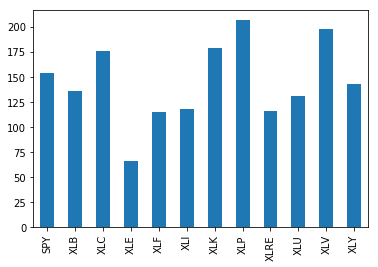

In [9]:
#calculate returns per amount of risk using sharpe ratio

sharpe_ratios = (market_comparison.mean() * 252) / (market_comparison.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

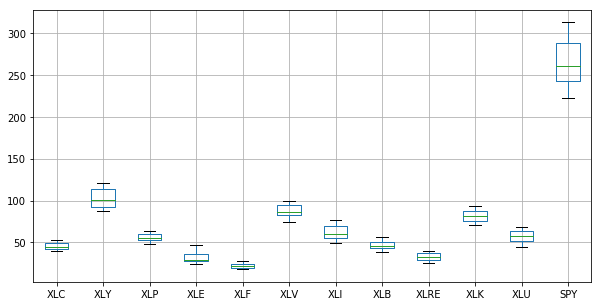

In [10]:
#plot the spread for all the ETFs

boxplot = market_comparison.boxplot(column=['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],figsize=(10,5))

In [11]:
market_comparison.std()

SPY     27.396816
XLB      5.472389
XLC      4.105490
XLE      7.841942
XLF      3.076354
XLI      8.402523
XLK      7.237646
XLP      4.314218
XLRE     4.529851
XLU      7.007431
XLV      7.086184
XLY     11.323204
dtype: float64

### Market comparison from april

In [12]:
#Set the dataframe for market comparison

market_comparison = etf_fromapril_df
market_comparison.head()

SPY        XLB        XLC        XLE        XLF        XLI  \
Date                                                                            
2020-04-01  246.149994  43.009998  42.480000  27.620001  19.549999  56.349998   
2020-04-02  251.830002  43.660000  43.020000  30.150000  20.040001  57.099998   
2020-04-03  248.190002  42.610001  42.150002  29.830000  19.639999  56.340000   
2020-04-06  264.859985  45.779999  44.930000  31.410000  21.049999  60.240002   
2020-04-07  265.130005  47.000000  45.259998  32.080002  21.260000  60.099998   

                  XLK        XLP       XLRE        XLU        XLV         XLY  
Date                                                                           
2020-04-01  76.540001  53.549999  29.120001  52.080002  85.209999   93.699997  
2020-04-02  78.330002  54.919998  29.549999  53.709999  87.570000   94.050003  
2020-04-03  77.120003  55.349998  29.299999  51.790001  86.779999   92.410004  
2020-04-06  83.699997  57.410000  31.420000  55.790001  91.330002  100.099998  
2020-04-07  82.949997  56.750000  31.430000  55.090000  90.580002  101.589996

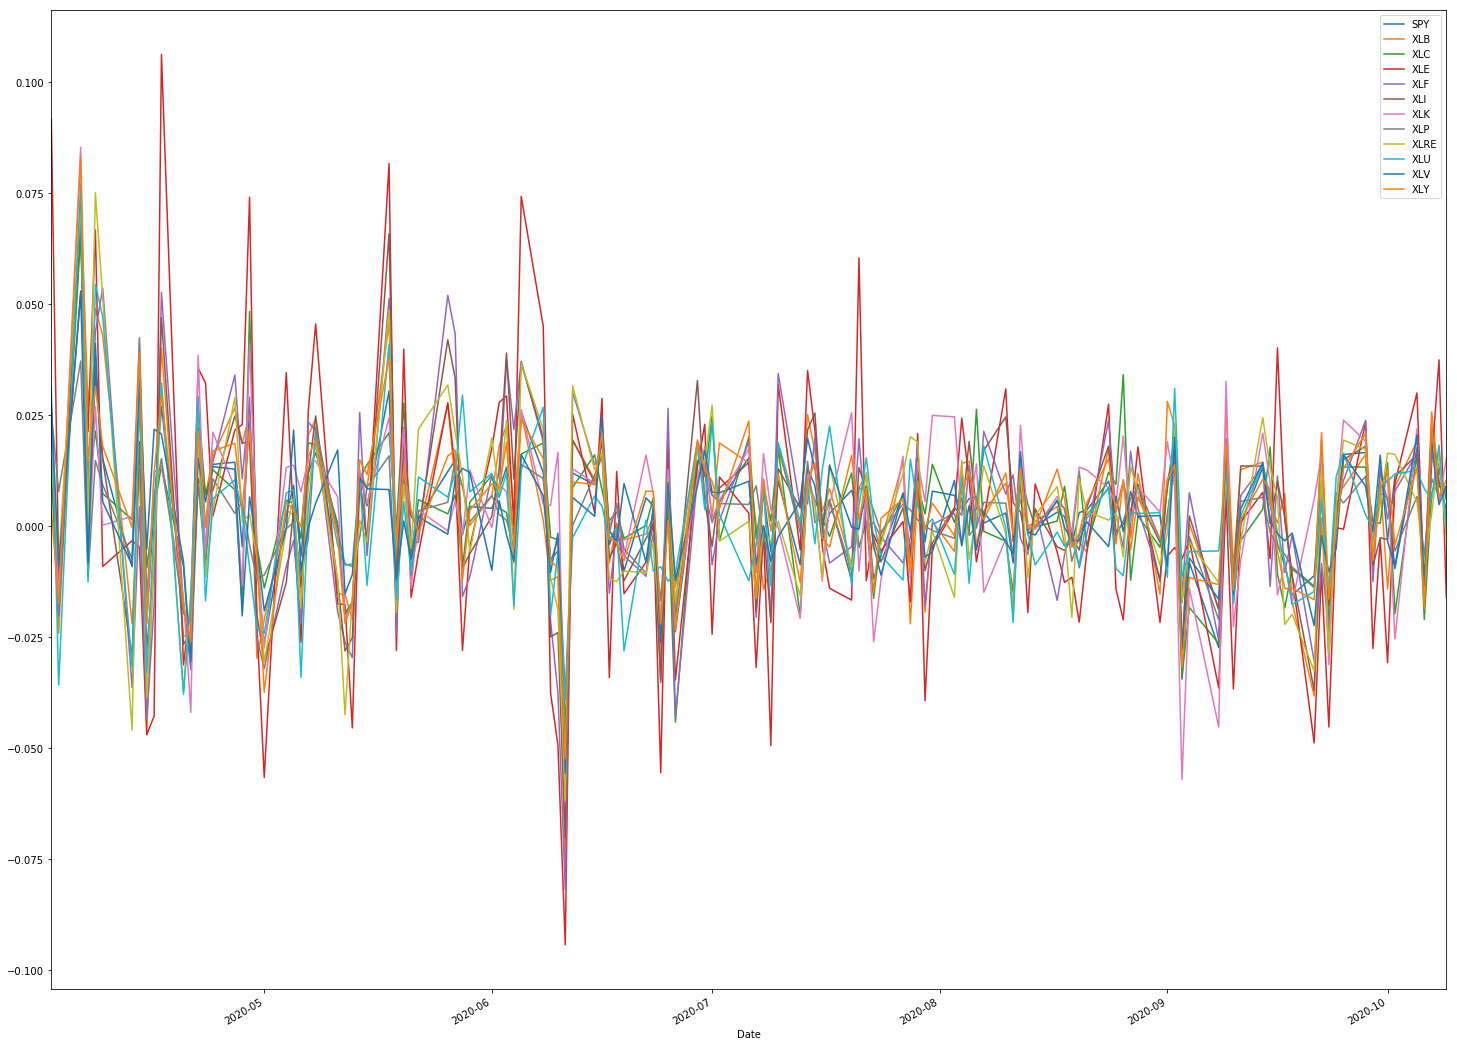

In [13]:
#calculate daily change and plot the same

change_comparison=market_comparison.pct_change()
change_comparison.dropna(inplace=True)
change_comparison.plot(figsize = (25,20))

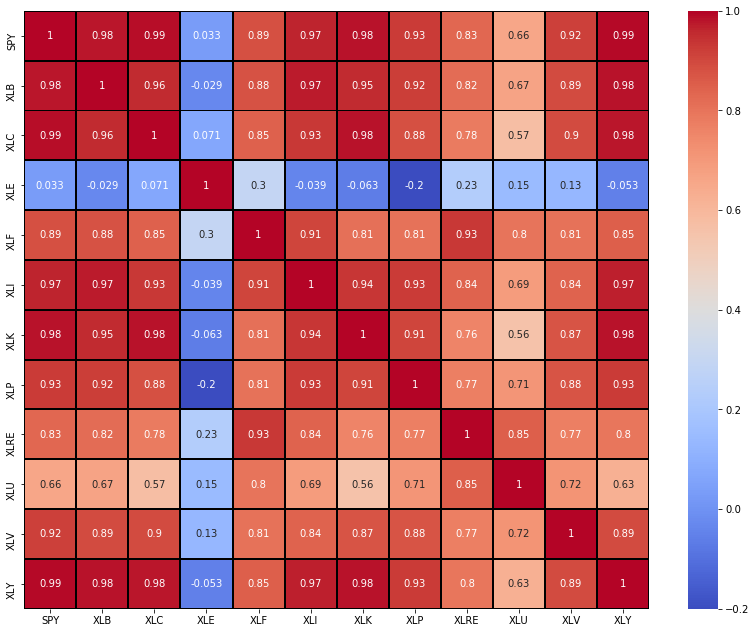

In [14]:
#plot correlations among all the ETFs

fig, ax = plt.subplots(figsize=(14,11))
sns.heatmap(market_comparison.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [15]:
#calculate beta for a 7 day rolling window and plot

XLB_beta = beta('XLB','SPY',7,market_comparison)
XLC_beta = beta('XLC','SPY',7,market_comparison)
XLE_beta = beta('XLE','SPY',7,market_comparison)
XLF_beta = beta('XLF','SPY',7,market_comparison)
XLY_beta = beta('XLY','SPY',7,market_comparison)
XLP_beta = beta('XLP','SPY',7,market_comparison)
XLV_beta = beta('XLV','SPY',7,market_comparison)
XLI_beta = beta('XLI','SPY',7,market_comparison)
XLRE_beta = beta('XLRE','SPY',7,market_comparison)
XLK_beta = beta('XLK','SPY',7,market_comparison)
XLU_beta = beta('XLU','SPY',7,market_comparison)

In [16]:
XLB_beta.hvplot(label = "XLB") * XLC_beta.hvplot(label = "XLC") *  XLE_beta.hvplot(label = "XLE") * XLF_beta.hvplot(label = "XLF") *XLY_beta.hvplot(label = "XLY") * XLP_beta.hvplot(label = "XLP") * XLV_beta.hvplot(label = "XLV") * XLI_beta.hvplot(label = "XLI") * XLRE_beta.hvplot(label = "XLRE") * XLK_beta.hvplot(label = "XLK") * XLU_beta.hvplot(label = "XLU")

:Overlay
   .Curve.XLB  :Curve   [Date]   (0)
   .Curve.XLC  :Curve   [Date]   (0)
   .Curve.XLE  :Curve   [Date]   (0)
   .Curve.XLF  :Curve   [Date]   (0)
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.XLP  :Curve   [Date]   (0)
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.XLI  :Curve   [Date]   (0)
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.XLU  :Curve   [Date]   (0)

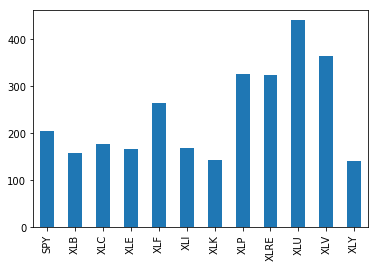

In [17]:
#calculate returns per amount of risk using sharpe ratio

sharpe_ratios = (market_comparison.mean() * 252) / (market_comparison.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

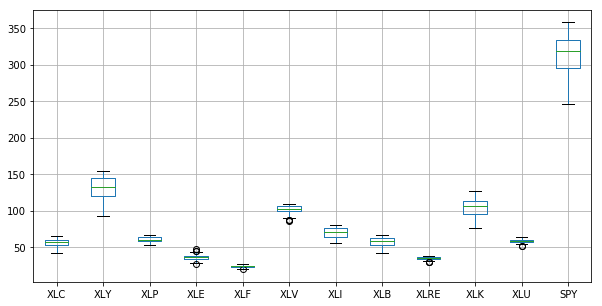

In [18]:
#plot the spread for all the ETFs

boxplot = market_comparison.boxplot(column=['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],figsize=(10,5))

### Market and Covid correlation analysis

### March month only

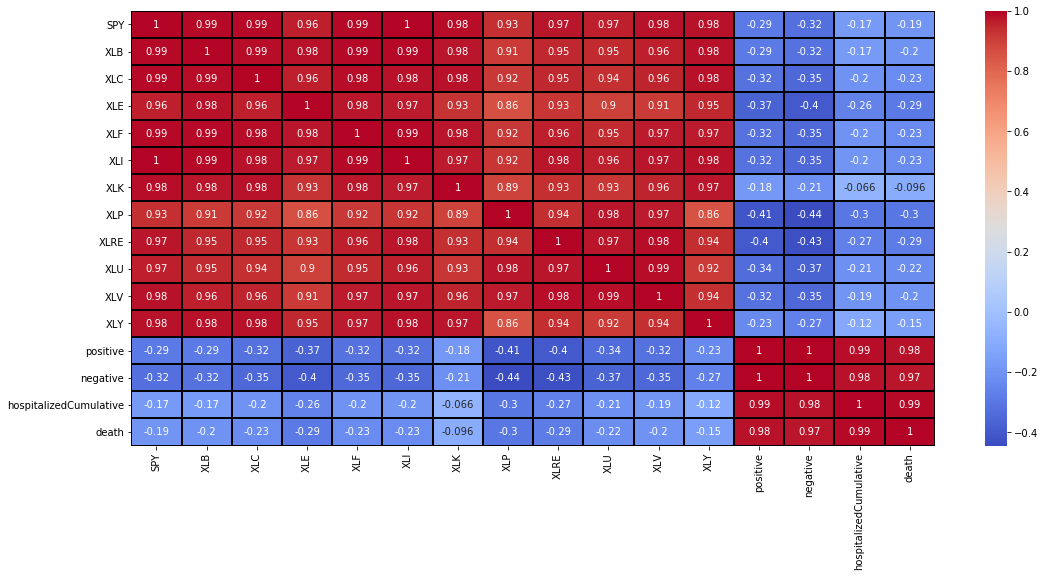

In [19]:
#plot correlations for ETFs and coronavistus data for positive cases, negative cases, hospitalized number and deaths

combined_dfs = pd.concat([etf_march_df,march_df], axis="columns")
combined_dfs_nw = combined_dfs.dropna()

fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(combined_dfs_nw.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [20]:
combined_dfs_nw.std()

SPY                           25.294885
XLB                            5.045587
XLC                            3.700530
XLE                            6.768714
XLF                            2.695639
XLI                            7.709889
XLK                            6.690706
XLP                            4.249687
XLRE                           4.361745
XLU                            6.880091
XLV                            6.972027
XLY                           10.471495
positive                   48471.044688
negative                  234279.533939
hospitalizedCumulative      5496.359747
death                        869.245539
dtype: float64

### From march till October

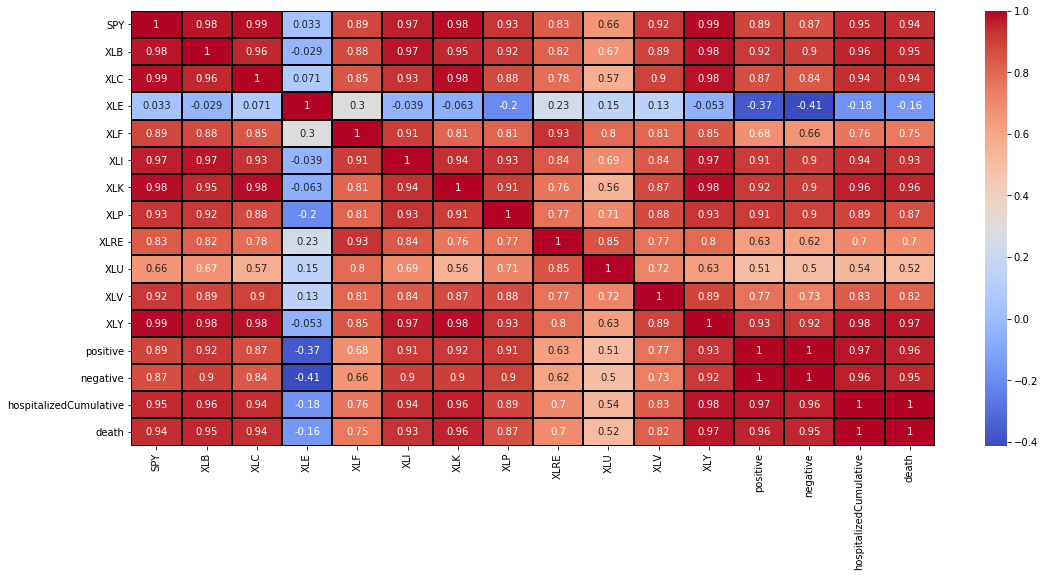

In [21]:
#plot correlations for ETFs and coronavistus data for positive cases, negative cases, hospitalized number and deaths

combined_df = pd.concat([etf_fromapril_df,from_april], axis="columns")
combined_df_nw = combined_df.dropna()

fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(combined_df_nw.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [22]:
combined_df_nw.std()

SPY                       2.424719e+01
XLB                       5.834118e+00
XLC                       4.985326e+00
XLE                       3.448942e+00
XLF                       1.412414e+00
XLI                       6.612949e+00
XLK                       1.155035e+01
XLP                       2.969818e+00
XLRE                      1.710576e+00
XLU                       2.113633e+00
XLV                       4.447056e+00
XLY                       1.480889e+01
positive                  2.284900e+06
negative                  3.103857e+07
hospitalizedCumulative    1.093884e+05
death                     5.408528e+04
dtype: float64

## Comparison by individual sectors with stocks and ETFs

### Materials

In [23]:
materials_df = yf.download(['HUN','EXP','NEM','FCX','SMG','SPY','XLB'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
materials_df = materials_df['Close']
materials_march_df = pd.concat([materials_df,march_df], axis = "columns")
materials_march_df.head()

EXP    FCX        HUN        NEM         SMG         SPY  \
2020-03-02  81.650002  10.50  19.299999  46.830002  114.849998  309.089996   
2020-03-03  81.550003  10.07  18.420000  49.730000  117.169998  300.239990   
2020-03-04  85.580002  10.45  18.690001  51.000000  125.250000  312.859985   
2020-03-05  82.089996   9.99  18.559999  52.080002  118.599998  302.459991   
2020-03-06  77.849998   9.43  17.870001  52.349998  117.779999  297.459991   

                  XLB  positive  negative  hospitalizedCumulative  death  
2020-03-02  54.980000       NaN       NaN                     NaN    NaN  
2020-03-03  54.500000       NaN       NaN                     NaN    NaN  
2020-03-04  56.759998     281.0    1417.0                     4.0   16.0  
2020-03-05  54.959999     388.0    1949.0                     5.0   20.0  
2020-03-06  53.529999     500.0    2672.0                     6.0   26.0

In [24]:
material_df = yf.download(['HUN','EXP','NEM','FCX','SMG','SPY','XLB'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
material_df = material_df['Close']
materials_fromapril_df = pd.concat([material_df,from_april], axis = "columns")
materials_fromapril_df.head()

EXP   FCX    HUN        NEM         SMG         SPY  \
2020-04-01  54.189999  6.31  13.34  46.470001  100.750000  246.149994   
2020-04-02  54.009998  6.39  13.28  48.230000  103.419998  251.830002   
2020-04-03  49.889999  6.32  12.93  47.150002  100.070000  248.190002   
2020-04-04        NaN   NaN    NaN        NaN         NaN         NaN   
2020-04-05        NaN   NaN    NaN        NaN         NaN         NaN   

                  XLB  positive  negative  hospitalizedCumulative    death  
2020-04-01  43.009998    224086    984489                 27953.0   5324.0  
2020-04-02  43.660000    252146   1075547                 32128.0   6496.0  
2020-04-03  42.610001    284222   1176560                 36682.0   7782.0  
2020-04-04        NaN    317434   1372626                 41768.0   9264.0  
2020-04-05        NaN    342934   1466925                 45671.0  10604.0

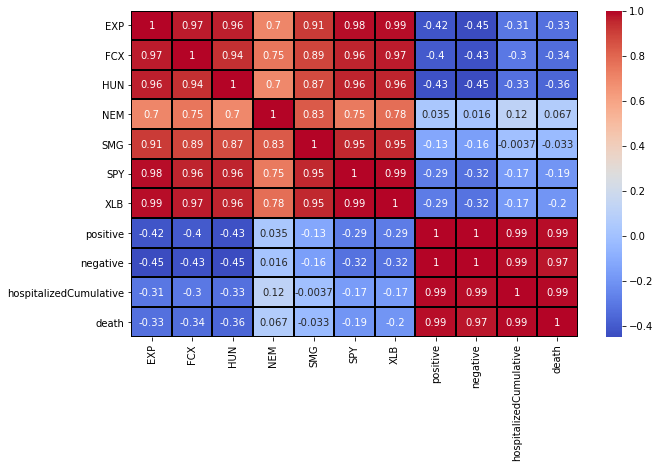

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(materials_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

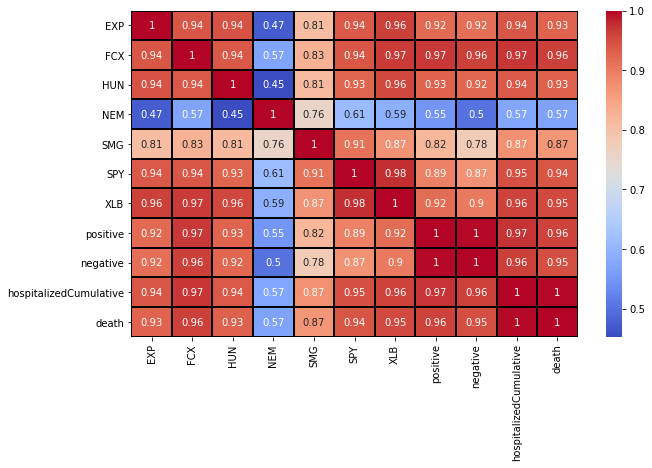

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(materials_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [27]:
EXP_beta = beta('EXP','SPY',7,materials_march_df)
FCX_beta = beta('FCX','SPY',7,materials_march_df)
HUN_beta = beta('HUN','SPY',7,materials_march_df)
NEM_beta = beta('NEM','SPY',7,materials_march_df)
SMG_beta = beta('SMG','SPY',7,materials_march_df)

In [28]:
XLB_beta.hvplot(label = "XLB") * EXP_beta.hvplot(label = "EXP") * FCX_beta.hvplot(label = "FCX") * HUN_beta.hvplot(label = "HUN") * NEM_beta.hvplot(label = "NEM") * SMG_beta.hvplot(label = "SMG")

:Overlay
   .Curve.XLB :Curve   [Date]   (0)
   .Curve.EXP :Curve   [index]   (0)
   .Curve.FCX :Curve   [index]   (0)
   .Curve.HUN :Curve   [index]   (0)
   .Curve.NEM :Curve   [index]   (0)
   .Curve.SMG :Curve   [index]   (0)

In [29]:
EXP_beta = beta('EXP','SPY',7,materials_fromapril_df)
FCX_beta = beta('FCX','SPY',7,materials_fromapril_df)
HUN_beta = beta('HUN','SPY',7,materials_fromapril_df)
NEM_beta = beta('NEM','SPY',7,materials_fromapril_df)
SMG_beta = beta('SMG','SPY',7,materials_fromapril_df)

In [30]:
XLB_beta.hvplot(label = "XLB") * EXP_beta.hvplot(label = "EXP") * FCX_beta.hvplot(label = "FCX") * HUN_beta.hvplot(label = "HUN") * NEM_beta.hvplot(label = "NEM") * SMG_beta.hvplot(label = "SMG")

:Overlay
   .Curve.XLB :Curve   [Date]   (0)
   .Curve.EXP :Curve   [index]   (0)
   .Curve.FCX :Curve   [index]   (0)
   .Curve.HUN :Curve   [index]   (0)
   .Curve.NEM :Curve   [index]   (0)
   .Curve.SMG :Curve   [index]   (0)

In [31]:
materials_march_df.std()

EXP                           13.338425
FCX                            1.734625
HUN                            1.943603
NEM                            3.837266
SMG                           13.214513
SPY                           27.396816
XLB                            5.472389
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [32]:
### materials_fromapril_df.std()

### Communications

In [33]:
communications_df = yf.download(['VIAC','T','DISCK','FB','GOOG','SPY','XLC'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
communications_df = communications_df['Close']
communications_march_df = pd.concat([communications_df,march_df], axis = "columns")
communications_march_df.tail()

DISCK          FB         GOOG         SPY      T   VIAC  \
2020-03-27  17.160000  156.789993  1110.709961  253.419998  29.84  12.79   
2020-03-28        NaN         NaN          NaN         NaN    NaN    NaN   
2020-03-29        NaN         NaN          NaN         NaN    NaN    NaN   
2020-03-30  17.950001  165.949997  1146.819946  261.649994  30.23  14.09   
2020-03-31        NaN         NaN          NaN         NaN    NaN    NaN   

                  XLC  positive  negative  hospitalizedCumulative   death  
2020-03-27  42.759998  112127.0  561583.0                 12083.0  1775.0  
2020-03-28        NaN  131819.0  648958.0                 14508.0  2313.0  
2020-03-29        NaN  151400.0  717145.0                 17283.0  2834.0  
2020-03-30  44.320000  173442.0  813851.0                 19819.0  3423.0  
2020-03-31        NaN  198295.0  901508.0                 23725.0  4313.0

In [34]:
communications_df = yf.download(['VIAC','T','DISCK','FB','GOOG','SPY','XLC'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
communications_df = communications_df['Close']
communications_fromappril_df = pd.concat([communications_df,from_april], axis = "columns")
communications_fromappril_df.tail()

DISCK          FB         GOOG         SPY          T  \
2020-10-05  19.719999  264.649994  1486.020020  339.760010  28.670000   
2020-10-06  19.340000  258.660004  1453.439941  334.929993  28.709999   
2020-10-07  19.990000  258.119995  1460.290039  340.760010  28.799999   
2020-10-08  20.469999  263.760010  1485.930054  343.779999  28.610001   
2020-10-09  19.969999  264.450012  1515.219971  346.850006  28.320000   

                 VIAC        XLC  positive   negative  hospitalizedCumulative  \
2020-10-05  28.389999  60.029999   7421973   97210380                415085.0   
2020-10-06  28.450001  58.770000   7460634   97932855                414461.0   
2020-10-07  28.850000  59.200001   7511236   98665547                416711.0   
2020-10-08  29.610001  59.970001   7566106   99541032                418763.0   
2020-10-09  28.920000  60.330002   7623648  100497078                420587.0   

               death  
2020-10-05  202041.0  
2020-10-06  202675.0  
2020-10-07  203591.0  
2020-10-08  204566.0  
2020-10-09  205470.0

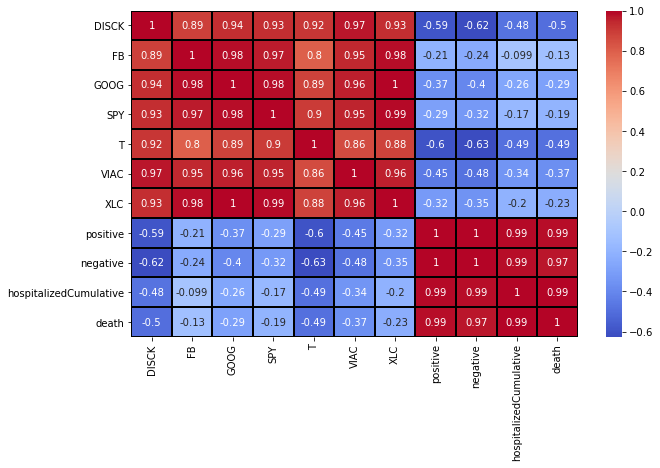

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(communications_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

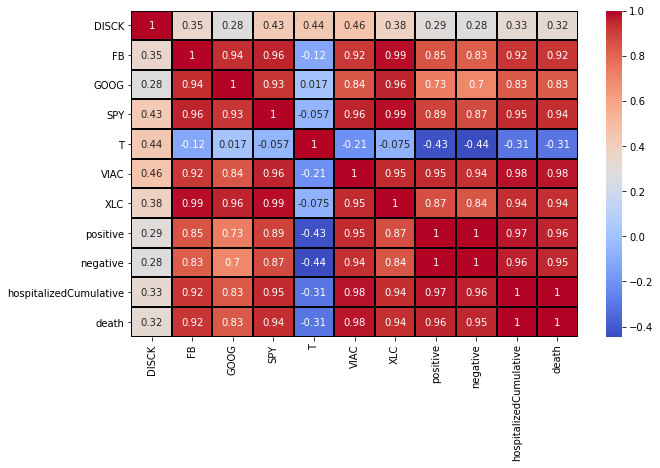

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(communications_fromappril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [37]:
DISCK_beta = beta('DISCK','SPY',7,communications_march_df)
FB_beta = beta('FB','SPY',7,communications_march_df)
GOOG_beta = beta('GOOG','SPY',7,communications_march_df)
T_beta = beta('T','SPY',7,communications_march_df)
VIAC_beta = beta('VIAC','SPY',7,communications_march_df)

In [38]:
XLC_beta.hvplot(label = "XLC") * DISCK_beta.hvplot(label = "DISCK") * FB_beta.hvplot(label = "FB") * GOOG_beta.hvplot(label = "GOOG") * T_beta.hvplot(label = "T") * VIAC_beta.hvplot(label = "VIAC")

:Overlay
   .Curve.XLC   :Curve   [Date]   (0)
   .Curve.DISCK :Curve   [index]   (0)
   .Curve.FB    :Curve   [index]   (0)
   .Curve.GOOG  :Curve   [index]   (0)
   .Curve.T     :Curve   [index]   (0)
   .Curve.VIAC  :Curve   [index]   (0)

In [39]:
DISCK_beta = beta('DISCK','SPY',7,communications_fromappril_df)
FB_beta = beta('FB','SPY',7,communications_fromappril_df)
GOOG_beta = beta('GOOG','SPY',7,communications_fromappril_df)
T_beta = beta('T','SPY',7,communications_fromappril_df)
VIAC_beta = beta('VIAC','SPY',7,communications_fromappril_df)

In [40]:
XLC_beta.hvplot(label = "XLC") * DISCK_beta.hvplot(label = "DISCK") * FB_beta.hvplot(label = "FB") * GOOG_beta.hvplot(label = "GOOG") * T_beta.hvplot(label = "T") * VIAC_beta.hvplot(label = "VIAC")

:Overlay
   .Curve.XLC   :Curve   [Date]   (0)
   .Curve.DISCK :Curve   [index]   (0)
   .Curve.FB    :Curve   [index]   (0)
   .Curve.GOOG  :Curve   [index]   (0)
   .Curve.T     :Curve   [index]   (0)
   .Curve.VIAC  :Curve   [index]   (0)

In [41]:
communications_march_df.std()

DISCK                          3.023508
FB                            15.668228
GOOG                         106.599596
SPY                           27.396816
T                              3.463096
VIAC                           4.288321
XLC                            4.105490
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [42]:
communications_fromappril_df.std()

DISCK                     1.077678e+00
FB                        3.294283e+01
GOOG                      1.167673e+02
SPY                       2.424719e+01
T                         9.658257e-01
VIAC                      5.140835e+00
XLC                       4.985326e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Energy

In [43]:
energy_df = yf.download(['OKE','COP','VLO','LNG','MUR','SPY','XLE'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
energy_df = energy_df['Close']
energy_march_df = pd.concat([energy_df,march_df], axis = "columns")
energy_march_df.head()


COP        LNG        MUR        OKE         SPY        VLO  \
2020-03-02  49.230000  52.080002  19.059999  69.129997  309.089996  67.870003   
2020-03-03  48.119999  50.540001  18.760000  68.250000  300.239990  64.440002   
2020-03-04  49.430000  49.450001  18.980000  70.660004  312.859985  64.150002   
2020-03-05  47.700001  45.980000  18.160000  68.690002  302.459991  61.700001   
2020-03-06  45.330002  45.520000  15.860000  61.209999  297.459991  63.090000   

                  XLE  positive  negative  hospitalizedCumulative  death  
2020-03-02  47.099998       NaN       NaN                     NaN    NaN  
2020-03-03  45.660000       NaN       NaN                     NaN    NaN  
2020-03-04  46.740002     281.0    1417.0                     4.0   16.0  
2020-03-05  45.029999     388.0    1949.0                     5.0   20.0  
2020-03-06  42.500000     500.0    2672.0                     6.0   26.0

In [44]:
energy_df = yf.download(['OKE','COP','VLO','LNG','MUR','SPY','XLE'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
energy_df = energy_df['Close']
energy_fromapril_df = pd.concat([energy_df,from_april], axis = "columns")
energy_fromapril_df.head()

COP        LNG   MUR        OKE         SPY    VLO  \
2020-04-01  29.620001  32.000000  5.60  19.200001  246.149994  41.00   
2020-04-02  33.860001  33.919998  6.23  21.629999  251.830002  41.50   
2020-04-03  32.910000  32.200001  5.96  21.639999  248.190002  40.34   
2020-04-04        NaN        NaN   NaN        NaN         NaN    NaN   
2020-04-05        NaN        NaN   NaN        NaN         NaN    NaN   

                  XLE  positive  negative  hospitalizedCumulative    death  
2020-04-01  27.620001    224086    984489                 27953.0   5324.0  
2020-04-02  30.150000    252146   1075547                 32128.0   6496.0  
2020-04-03  29.830000    284222   1176560                 36682.0   7782.0  
2020-04-04        NaN    317434   1372626                 41768.0   9264.0  
2020-04-05        NaN    342934   1466925                 45671.0  10604.0

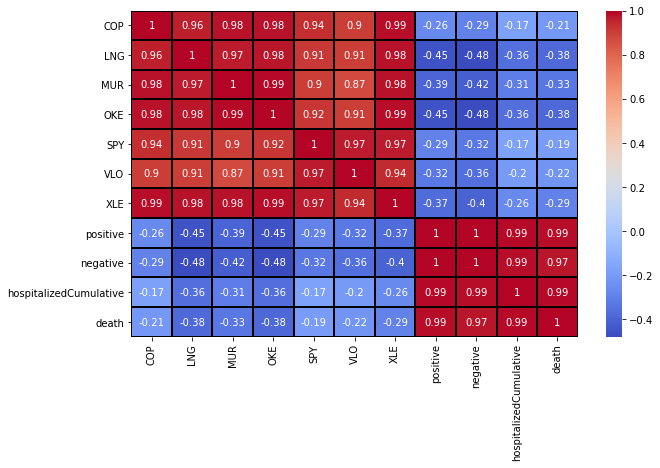

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(energy_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

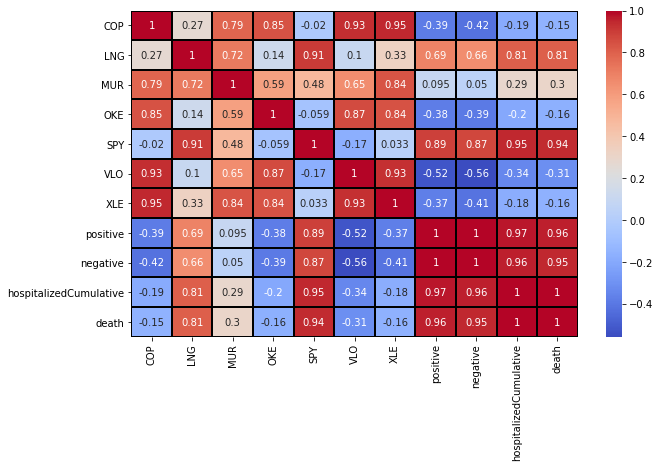

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(energy_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [47]:
OKE_beta = beta('OKE','SPY',7,energy_march_df)
COP_beta = beta('COP','SPY',7,energy_march_df)
VLO_beta = beta('VLO','SPY',7,energy_march_df)
LNG_beta = beta('LNG','SPY',7,energy_march_df)
MUR_beta = beta('MUR','SPY',7,energy_march_df)

In [48]:
XLC_beta.hvplot(label = "XLE") * OKE_beta.hvplot(label = "OKE") * COP_beta.hvplot(label = "COP") * VLO_beta.hvplot(label = "VLO") * LNG_beta.hvplot(label = "LNG") * MUR_beta.hvplot(label = "MUR")

:Overlay
   .Curve.XLE :Curve   [Date]   (0)
   .Curve.OKE :Curve   [index]   (0)
   .Curve.COP :Curve   [index]   (0)
   .Curve.VLO :Curve   [index]   (0)
   .Curve.LNG :Curve   [index]   (0)
   .Curve.MUR :Curve   [index]   (0)

In [49]:
OKE_beta = beta('OKE','SPY',7,energy_fromapril_df)
COP_beta = beta('COP','SPY',7,energy_fromapril_df)
VLO_beta = beta('VLO','SPY',7,energy_fromapril_df)
LNG_beta = beta('LNG','SPY',7,energy_fromapril_df)
MUR_beta = beta('MUR','SPY',7,energy_fromapril_df)

In [50]:
XLC_beta.hvplot(label = "XLE") * OKE_beta.hvplot(label = "OKE") * COP_beta.hvplot(label = "COP") * VLO_beta.hvplot(label = "VLO") * LNG_beta.hvplot(label = "LNG") * MUR_beta.hvplot(label = "MUR")

:Overlay
   .Curve.XLE :Curve   [Date]   (0)
   .Curve.OKE :Curve   [index]   (0)
   .Curve.COP :Curve   [index]   (0)
   .Curve.VLO :Curve   [index]   (0)
   .Curve.LNG :Curve   [index]   (0)
   .Curve.MUR :Curve   [index]   (0)

In [51]:
energy_march_df.std()

COP                            8.820352
LNG                            6.805009
MUR                            5.260552
OKE                           19.502210
SPY                           27.396816
VLO                           11.491703
XLE                            7.841942
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [52]:
energy_fromapril_df.std()

COP                       4.113329e+00
LNG                       4.816006e+00
MUR                       2.720286e+00
OKE                       4.725414e+00
SPY                       2.424719e+01
VLO                       7.981007e+00
XLE                       3.448942e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Finance

In [53]:
finance_df = yf.download(['BHF','UNM','MET','CFG','LFC','SPY','XLF'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
finance_df = finance_df['Close']
finance_march_df = pd.concat([finance_df,march_df], axis = "columns")
finance_march_df.head()

BHF        CFG    LFC        MET         SPY        UNM  \
2020-03-02  37.459999  33.320000  11.79  44.560001  309.089996  25.040001   
2020-03-03  34.160000  31.150000  11.66  42.570000  300.239990  22.790001   
2020-03-04  35.049999  31.709999  11.74  43.830002  312.859985  23.110001   
2020-03-05  31.969999  29.770000  11.70  40.619999  302.459991  21.530001   
2020-03-06  29.770000  27.980000  11.42  39.180000  297.459991  20.650000   

                  XLF  positive  negative  hospitalizedCumulative  death  
2020-03-02  27.950001       NaN       NaN                     NaN    NaN  
2020-03-03  26.900000       NaN       NaN                     NaN    NaN  
2020-03-04  27.790001     281.0    1417.0                     4.0   16.0  
2020-03-05  26.450001     388.0    1949.0                     5.0   20.0  
2020-03-06  25.549999     500.0    2672.0                     6.0   26.0

In [54]:
finance_df = yf.download(['BHF','UNM','MET','CFG','LFC','SPY','XLF'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
finance_df = finance_df['Close']
finance_fromapril_df = pd.concat([finance_df,from_april], axis = "columns")
finance_fromapril_df.head()

BHF        CFG   LFC        MET         SPY    UNM  \
2020-04-01  21.200001  17.299999  9.44  27.900000  246.149994  13.10   
2020-04-02  20.389999  17.420000  9.72  28.049999  251.830002  12.96   
2020-04-03  19.700001  16.940001  9.66  27.719999  248.190002  13.46   
2020-04-04        NaN        NaN   NaN        NaN         NaN    NaN   
2020-04-05        NaN        NaN   NaN        NaN         NaN    NaN   

                  XLF  positive  negative  hospitalizedCumulative    death  
2020-04-01  19.549999    224086    984489                 27953.0   5324.0  
2020-04-02  20.040001    252146   1075547                 32128.0   6496.0  
2020-04-03  19.639999    284222   1176560                 36682.0   7782.0  
2020-04-04        NaN    317434   1372626                 41768.0   9264.0  
2020-04-05        NaN    342934   1466925                 45671.0  10604.0

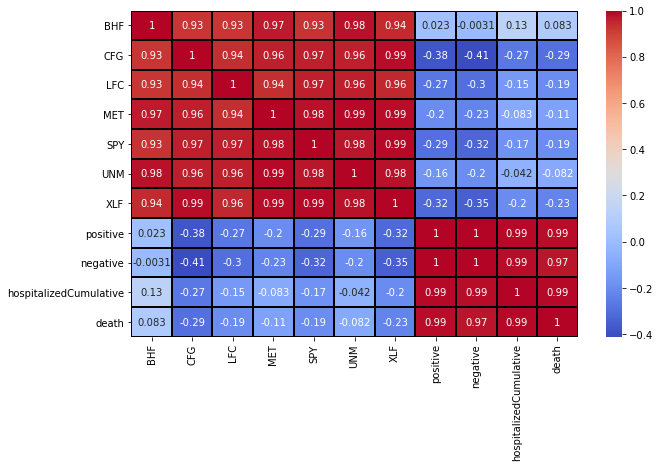

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(finance_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

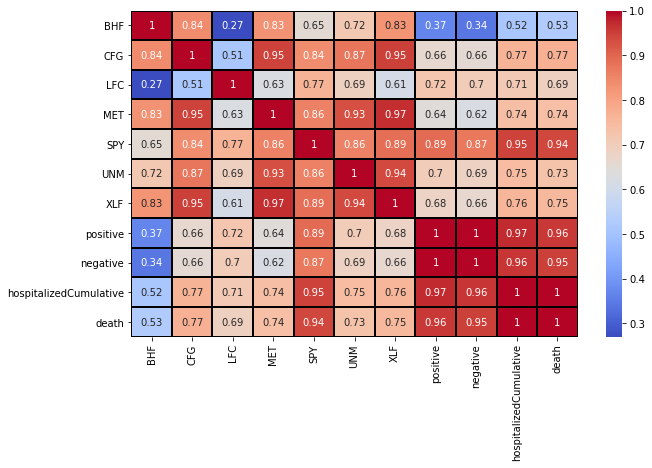

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(finance_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [57]:
BHF_beta = beta('BHF','SPY',7,finance_march_df)
UNM_beta = beta('UNM','SPY',7,finance_march_df)
MET_beta = beta('MET','SPY',7,finance_march_df)
CFG_beta = beta('CFG','SPY',7,finance_march_df)
LFC_beta = beta('LFC','SPY',7,finance_march_df)

In [58]:
XLF_beta.hvplot(label = "XLF") * BHF_beta.hvplot(label = "BHF") * UNM_beta.hvplot(label = "UNM") * MET_beta.hvplot(label = "MET") * CFG_beta.hvplot(label = "CFG") * LFC_beta.hvplot(label = "LFC")

:Overlay
   .Curve.XLF :Curve   [Date]   (0)
   .Curve.BHF :Curve   [index]   (0)
   .Curve.UNM :Curve   [index]   (0)
   .Curve.MET :Curve   [index]   (0)
   .Curve.CFG :Curve   [index]   (0)
   .Curve.LFC :Curve   [index]   (0)

In [59]:
BHF_beta = beta('BHF','SPY',7,finance_fromapril_df)
UNM_beta = beta('UNM','SPY',7,finance_fromapril_df)
MET_beta = beta('MET','SPY',7,finance_fromapril_df)
CFG_beta = beta('CFG','SPY',7,finance_fromapril_df)
LFC_beta = beta('LFC','SPY',7,finance_fromapril_df)

In [60]:
XLF_beta.hvplot(label = "XLF") * BHF_beta.hvplot(label = "BHF") * UNM_beta.hvplot(label = "UNM") * MET_beta.hvplot(label = "MET") * CFG_beta.hvplot(label = "CFG") * LFC_beta.hvplot(label = "LFC")

:Overlay
   .Curve.XLF :Curve   [Date]   (0)
   .Curve.BHF :Curve   [index]   (0)
   .Curve.UNM :Curve   [index]   (0)
   .Curve.MET :Curve   [index]   (0)
   .Curve.CFG :Curve   [index]   (0)
   .Curve.LFC :Curve   [index]   (0)

In [61]:
finance_march_df.std()

BHF                            6.367452
CFG                            5.514720
LFC                            1.115492
MET                            6.291898
SPY                           27.396816
UNM                            4.361109
XLF                            3.076354
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [62]:
finance_fromapril_df.std()

BHF                       3.406619e+00
CFG                       2.780261e+00
LFC                       1.050349e+00
MET                       2.780093e+00
SPY                       2.424719e+01
UNM                       1.596499e+00
XLF                       1.412414e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Industrials

In [63]:
industrial_df = yf.download(['EAF','AL','HII','FDX','VRT','SPY','XLI'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
industrial_df = industrial_df['Close']
industrial_march_df = pd.concat([industrial_df,march_df], axis = "columns")
industrial_march_df.head()

AL   EAF         FDX         HII         SPY    VRT  \
2020-03-02  39.200001  8.60  139.750000  209.639999  309.089996  11.76   
2020-03-03  38.220001  8.20  133.089996  207.600006  300.239990  11.14   
2020-03-04  38.090000  8.35  136.410004  219.539993  312.859985  11.24   
2020-03-05  35.000000  8.00  129.929993  209.690002  302.459991  10.49   
2020-03-06  35.070000  7.76  127.680000  204.289993  297.459991  10.00   

                  XLI  positive  negative  hospitalizedCumulative  death  
2020-03-02  75.650002       NaN       NaN                     NaN    NaN  
2020-03-03  73.800003       NaN       NaN                     NaN    NaN  
2020-03-04  76.849998     281.0    1417.0                     4.0   16.0  
2020-03-05  73.089996     388.0    1949.0                     5.0   20.0  
2020-03-06  72.449997     500.0    2672.0                     6.0   26.0

In [64]:
industrial_df = yf.download(['EAF','AL','HII','FDX','VRT','SPY','XLI'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
industrial_df = industrial_df['Close']
industrial_fromapril_df = pd.concat([industrial_df,from_april], axis = "columns")
industrial_fromapril_df.head()

AL   EAF         FDX         HII         SPY   VRT  \
2020-04-01  20.600000  7.38  113.480003  173.139999  246.149994  8.07   
2020-04-02  20.340000  7.47  116.639999  180.639999  251.830002  8.13   
2020-04-03  18.889999  7.01  109.220001  181.039993  248.190002  7.90   
2020-04-04        NaN   NaN         NaN         NaN         NaN   NaN   
2020-04-05        NaN   NaN         NaN         NaN         NaN   NaN   

                  XLI  positive  negative  hospitalizedCumulative    death  
2020-04-01  56.349998    224086    984489                 27953.0   5324.0  
2020-04-02  57.099998    252146   1075547                 32128.0   6496.0  
2020-04-03  56.340000    284222   1176560                 36682.0   7782.0  
2020-04-04        NaN    317434   1372626                 41768.0   9264.0  
2020-04-05        NaN    342934   1466925                 45671.0  10604.0

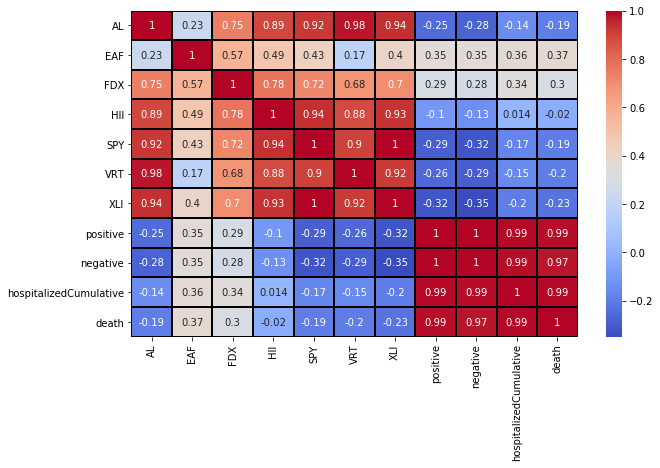

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(industrial_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

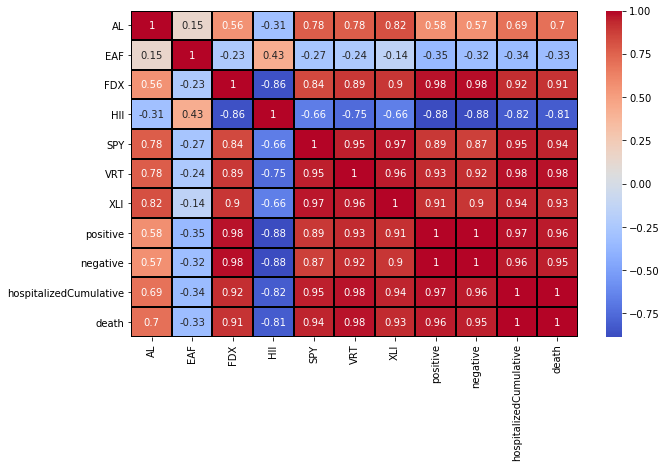

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(industrial_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [67]:
EAF_beta = beta('EAF','SPY',7,industrial_march_df)
AL_beta = beta('AL','SPY',7,industrial_march_df)
HII_beta = beta('HII','SPY',7,industrial_march_df)
FDX_beta = beta('FDX','SPY',7,industrial_march_df)
VRT_beta = beta('VRT','SPY',7,industrial_march_df)

In [68]:
XLI_beta.hvplot(label = "XLI") * EAF_beta.hvplot(label = "EAF") * AL_beta.hvplot(label = "AL") * HII_beta.hvplot(label = "HII") * FDX_beta.hvplot(label = "FDX") * VRT_beta.hvplot(label = "VRT")

:Overlay
   .Curve.XLI :Curve   [Date]   (0)
   .Curve.EAF :Curve   [index]   (0)
   .Curve.AL  :Curve   [index]   (0)
   .Curve.HII :Curve   [index]   (0)
   .Curve.FDX :Curve   [index]   (0)
   .Curve.VRT :Curve   [index]   (0)

In [69]:
EAF_beta = beta('EAF','SPY',7,industrial_fromapril_df)
AL_beta = beta('AL','SPY',7,industrial_fromapril_df)
HII_beta = beta('HII','SPY',7,industrial_fromapril_df)
FDX_beta = beta('FDX','SPY',7,industrial_fromapril_df)
VRT_beta = beta('VRT','SPY',7,industrial_fromapril_df)

In [70]:
XLI_beta.hvplot(label = "XLI") * EAF_beta.hvplot(label = "EAF") * AL_beta.hvplot(label = "AL") * HII_beta.hvplot(label = "HII") * FDX_beta.hvplot(label = "FDX") * VRT_beta.hvplot(label = "VRT")

:Overlay
   .Curve.XLI :Curve   [Date]   (0)
   .Curve.EAF :Curve   [index]   (0)
   .Curve.AL  :Curve   [index]   (0)
   .Curve.HII :Curve   [index]   (0)
   .Curve.FDX :Curve   [index]   (0)
   .Curve.VRT :Curve   [index]   (0)

In [71]:
industrial_march_df.std()

AL                             8.740209
EAF                            0.777495
FDX                           13.635154
HII                           20.278103
SPY                           27.396816
VRT                            1.742009
XLI                            8.402523
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [72]:
industrial_fromapril_df.std()

AL                        3.654821e+00
EAF                       6.443286e-01
FDX                       4.877339e+01
HII                       1.772629e+01
SPY                       2.424719e+01
VRT                       2.713264e+00
XLI                       6.612949e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Technology

In [73]:
technology_df = yf.download(['MSFT','DELL','NLOK','XRX','NCR','SPY','XLK'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
technology_df = technology_df['Close']
technology_march_df = pd.concat([technology_df,march_df], axis = "columns")
technology_march_df.head()

DELL        MSFT    NCR       NLOK         SPY        XLK  \
2020-03-02  42.389999  172.789993  25.98  19.930000  309.089996  93.480003   
2020-03-03  41.779999  164.509995  24.92  19.290001  300.239990  89.930000   
2020-03-04  43.380001  170.550003  25.23  19.709999  312.859985  93.790001   
2020-03-05  40.849998  166.270004  23.40  19.350000  302.459991  90.830002   
2020-03-06  39.619999  161.570007  23.18  18.680000  297.459991  88.910004   

                  XRX  positive  negative  hospitalizedCumulative  death  
2020-03-02  33.509998       NaN       NaN                     NaN    NaN  
2020-03-03  31.870001       NaN       NaN                     NaN    NaN  
2020-03-04  33.689999     281.0    1417.0                     4.0   16.0  
2020-03-05  31.660000     388.0    1949.0                     5.0   20.0  
2020-03-06  31.290001     500.0    2672.0                     6.0   26.0

In [74]:
technology_df = yf.download(['MSFT','DELL','NLOK','XRX','NCR','SPY','XLK'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
technology_df = technology_df['Close']
technology_fromapril_df = pd.concat([technology_df,from_april], axis = "columns")
technology_fromapril_df.head()

DELL        MSFT        NCR       NLOK         SPY  \
2020-04-01  36.900002  152.110001  18.809999  18.760000  246.149994   
2020-04-02  37.139999  155.259995  18.309999  18.469999  251.830002   
2020-04-03  36.439999  153.830002  18.190001  18.290001  248.190002   
2020-04-04        NaN         NaN        NaN        NaN         NaN   
2020-04-05        NaN         NaN        NaN        NaN         NaN   

                  XLK    XRX  positive  negative  hospitalizedCumulative  \
2020-04-01  76.540001  17.60    224086    984489                 27953.0   
2020-04-02  78.330002  18.48    252146   1075547                 32128.0   
2020-04-03  77.120003  16.90    284222   1176560                 36682.0   
2020-04-04        NaN    NaN    317434   1372626                 41768.0   
2020-04-05        NaN    NaN    342934   1466925                 45671.0   

              death  
2020-04-01   5324.0  
2020-04-02   6496.0  
2020-04-03   7782.0  
2020-04-04   9264.0  
2020-04-05  10604.0

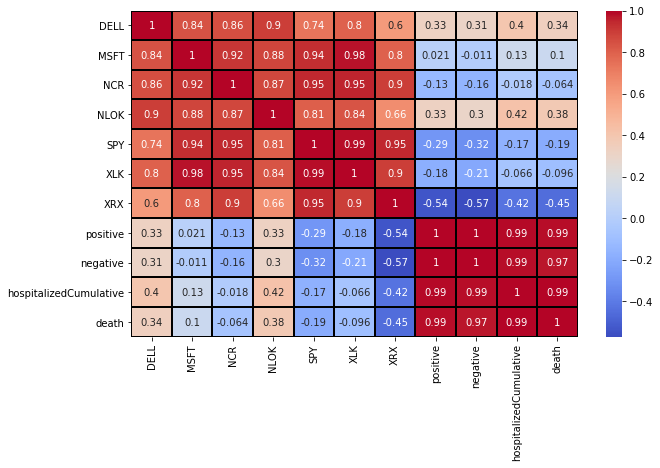

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(technology_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

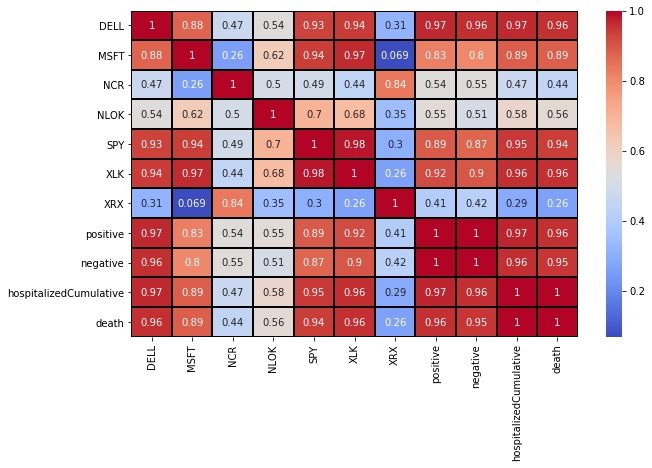

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(technology_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [77]:
MSFT_beta = beta('MSFT','SPY',7,technology_march_df)
DELL_beta = beta('DELL','SPY',7,technology_march_df)
NLOK_beta = beta('NLOK','SPY',7,technology_march_df)
XRX_beta = beta('XRX','SPY',7,technology_march_df)
NCR_beta = beta('NCR','SPY',7,technology_march_df)

In [78]:
XLK_beta.hvplot(label = "XLK") * MSFT_beta.hvplot(label = "MSFT") * DELL_beta.hvplot(label = "DELL") * NLOK_beta.hvplot(label = "NLOK") * XRX_beta.hvplot(label = "XRX") * NCR_beta.hvplot(label = "NCR")

:Overlay
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.MSFT :Curve   [index]   (0)
   .Curve.DELL :Curve   [index]   (0)
   .Curve.NLOK :Curve   [index]   (0)
   .Curve.XRX  :Curve   [index]   (0)
   .Curve.NCR  :Curve   [index]   (0)

In [79]:
MSFT_beta = beta('MSFT','SPY',7,technology_fromapril_df)
DELL_beta = beta('DELL','SPY',7,technology_fromapril_df)
NLOK_beta = beta('NLOK','SPY',7,technology_fromapril_df)
XRX_beta = beta('XRX','SPY',7,technology_fromapril_df)
NCR_beta = beta('NCR','SPY',7,technology_fromapril_df)

In [80]:
XLK_beta.hvplot(label = "XLK") * MSFT_beta.hvplot(label = "MSFT") * DELL_beta.hvplot(label = "DELL") * NLOK_beta.hvplot(label = "NLOK") * XRX_beta.hvplot(label = "XRX") * NCR_beta.hvplot(label = "NCR")

:Overlay
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.MSFT :Curve   [index]   (0)
   .Curve.DELL :Curve   [index]   (0)
   .Curve.NLOK :Curve   [index]   (0)
   .Curve.XRX  :Curve   [index]   (0)
   .Curve.NCR  :Curve   [index]   (0)

In [81]:
technology_march_df.std()

DELL                           4.274204
MSFT                          11.510627
NCR                            4.424182
NLOK                           1.112471
SPY                           27.396816
XLK                            7.237646
XRX                            6.430202
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [82]:
technology_fromapril_df.std()

DELL                      1.008468e+01
MSFT                      1.705184e+01
NCR                       1.738055e+00
NLOK                      1.276083e+00
SPY                       2.424719e+01
XLK                       1.155035e+01
XRX                       1.321453e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Consumer Staples

In [83]:
cs_df = yf.download(['ACI','CPB','KR','PG','KO','SPY','XLP'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
cs_df = cs_df['Close']
cs_march_df = pd.concat([cs_df,march_df], axis = "columns")
cs_march_df.head()


1 Failed download:
- ACI: Data doesn't exist for startDate = 1583049600, endDate = 1585638000


ACI        CPB         KO         KR          PG         SPY  \
2020-03-02  NaN  47.980000  55.919998  29.680000  119.559998  309.089996   
2020-03-03  NaN  47.880001  56.060001  29.340000  118.169998  300.239990   
2020-03-04  NaN  52.720001  58.919998  30.959999  124.500000  312.859985   
2020-03-05  NaN  53.099998  56.740002  33.470001  121.629997  302.459991   
2020-03-06  NaN  51.759998  55.259998  32.040001  121.660004  297.459991   

                  XLP  positive  negative  hospitalizedCumulative  death  
2020-03-02  61.090000       NaN       NaN                     NaN    NaN  
2020-03-03  60.259998       NaN       NaN                     NaN    NaN  
2020-03-04  63.220001     281.0    1417.0                     4.0   16.0  
2020-03-05  62.029999     388.0    1949.0                     5.0   20.0  
2020-03-06  61.540001     500.0    2672.0                     6.0   26.0

In [84]:
cs_df = yf.download(['ACI','CPB','KR','PG','KO','SPY','XLP'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
cs_df = cs_df['Close']
cs_fromapril_df = pd.concat([cs_df,from_april], axis = "columns")
cs_fromapril_df.head()

ACI        CPB         KO         KR          PG         SPY  \
2020-04-01  NaN  45.980000  42.119999  30.500000  109.330002  246.149994   
2020-04-02  NaN  47.450001  43.950001  31.600000  114.400002  251.830002   
2020-04-03  NaN  49.529999  43.830002  32.290001  115.080002  248.190002   
2020-04-04  NaN        NaN        NaN        NaN         NaN         NaN   
2020-04-05  NaN        NaN        NaN        NaN         NaN         NaN   

                  XLP  positive  negative  hospitalizedCumulative    death  
2020-04-01  53.549999    224086    984489                 27953.0   5324.0  
2020-04-02  54.919998    252146   1075547                 32128.0   6496.0  
2020-04-03  55.349998    284222   1176560                 36682.0   7782.0  
2020-04-04        NaN    317434   1372626                 41768.0   9264.0  
2020-04-05        NaN    342934   1466925                 45671.0  10604.0

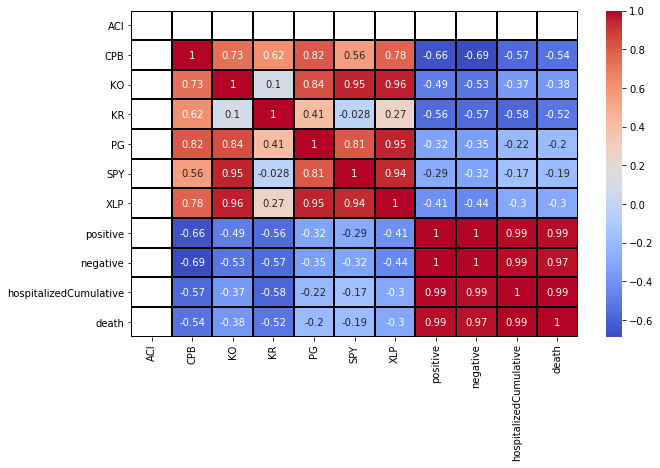

In [85]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cs_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

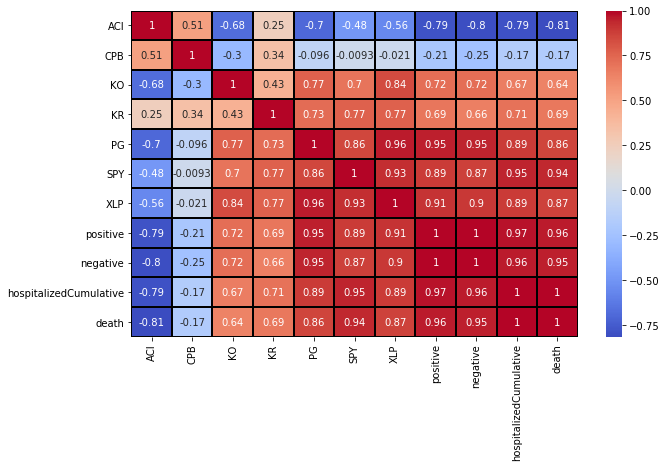

In [86]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cs_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [87]:
ACI_beta = beta('ACI','SPY',7,cs_march_df)
CPB_beta = beta('CPB','SPY',7,cs_march_df)
KR_beta = beta('KR','SPY',7,cs_march_df)
PG_beta = beta('PG','SPY',7,cs_march_df)
KO_beta = beta('KO','SPY',7,cs_march_df)

In [88]:
XLP_beta.hvplot(label = "XLP") * ACI_beta.hvplot(label = "ACI") * CPB_beta.hvplot(label = "CPB") * KR_beta.hvplot(label = "KR") * PG_beta.hvplot(label = "PG") * KO_beta.hvplot(label = "KO")

:Overlay
   .Curve.XLP :Curve   [Date]   (0)
   .Curve.ACI :Curve   [index]   (0)
   .Curve.CPB :Curve   [index]   (0)
   .Curve.KR  :Curve   [index]   (0)
   .Curve.PG  :Curve   [index]   (0)
   .Curve.KO  :Curve   [index]   (0)

In [89]:
ACI_beta = beta('ACI','SPY',7,cs_fromapril_df)
CPB_beta = beta('CPB','SPY',7,cs_fromapril_df)
KR_beta = beta('KR','SPY',7,cs_fromapril_df)
PG_beta = beta('PG','SPY',7,cs_fromapril_df)
KO_beta = beta('KO','SPY',7,cs_fromapril_df)

In [90]:
XLP_beta.hvplot(label = "XLP") * ACI_beta.hvplot(label = "ACI") * CPB_beta.hvplot(label = "CPB") * KR_beta.hvplot(label = "KR") * PG_beta.hvplot(label = "PG") * KO_beta.hvplot(label = "KO")

:Overlay
   .Curve.XLP :Curve   [Date]   (0)
   .Curve.ACI :Curve   [index]   (0)
   .Curve.CPB :Curve   [index]   (0)
   .Curve.KR  :Curve   [index]   (0)
   .Curve.PG  :Curve   [index]   (0)
   .Curve.KO  :Curve   [index]   (0)

In [91]:
cs_march_df.std()

ACI                                 NaN
CPB                            3.607934
KO                             6.572252
KR                             1.741857
PG                             7.878708
SPY                           27.396816
XLP                            4.314218
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [92]:
cs_fromapril_df.std()

ACI                       8.150670e-01
CPB                       1.986630e+00
KO                        2.003714e+00
KR                        1.384480e+00
PG                        9.768477e+00
SPY                       2.424719e+01
XLP                       2.969818e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Health Care

In [93]:
hc_df = yf.download(['BIIB','BIO','CVS','VRTX','ISRG','SPY','XLV'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
hc_df = hc_df['Close']
hc_march_df = pd.concat([hc_df,march_df], axis = "columns")
hc_march_df.head()

BIIB         BIO        CVS        ISRG         SPY  \
2020-03-02  327.890015  368.950012  64.029999  559.070007  309.089996   
2020-03-03  315.779999  370.000000  62.540001  558.270020  300.239990   
2020-03-04  328.450012  384.929993  66.040001  582.900024  312.859985   
2020-03-05  317.700012  386.679993  64.360001  568.369995  302.459991   
2020-03-06  317.950012  374.559998  64.150002  555.140015  297.459991   

                  VRTX        XLV  positive  negative  hospitalizedCumulative  \
2020-03-02  232.289993  96.949997       NaN       NaN                     NaN   
2020-03-03  228.259995  94.540001       NaN       NaN                     NaN   
2020-03-04  245.320007  99.989998     281.0    1417.0                     4.0   
2020-03-05  237.309998  97.669998     388.0    1949.0                     5.0   
2020-03-06  233.500000  97.150002     500.0    2672.0                     6.0   

            death  
2020-03-02    NaN  
2020-03-03    NaN  
2020-03-04   16.0  
2020-03-05   20.0  
2020-03-06   26.0

In [94]:
hc_df = yf.download(['BIIB','BIO','CVS','VRTX','ISRG','SPY','XLV'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
hc_df = hc_df['Close']
hc_fromapril_df = pd.concat([hc_df,from_april], axis = "columns")
hc_fromapril_df.head()

BIIB         BIO        CVS        ISRG         SPY  \
2020-04-01  293.269989  334.869995  58.340000  458.260010  246.149994   
2020-04-02  304.470001  360.739990  55.410000  467.720001  251.830002   
2020-04-03  300.510010  365.779999  55.720001  462.470001  248.190002   
2020-04-04         NaN         NaN        NaN         NaN         NaN   
2020-04-05         NaN         NaN        NaN         NaN         NaN   

                  VRTX        XLV  positive  negative  hospitalizedCumulative  \
2020-04-01  225.479996  85.209999    224086    984489                 27953.0   
2020-04-02  242.160004  87.570000    252146   1075547                 32128.0   
2020-04-03  238.309998  86.779999    284222   1176560                 36682.0   
2020-04-04         NaN        NaN    317434   1372626                 41768.0   
2020-04-05         NaN        NaN    342934   1466925                 45671.0   

              death  
2020-04-01   5324.0  
2020-04-02   6496.0  
2020-04-03   7782.0  
2020-04-04   9264.0  
2020-04-05  10604.0

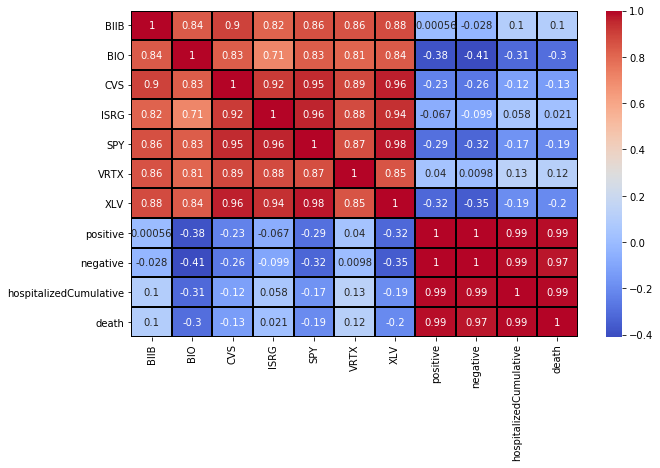

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(hc_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

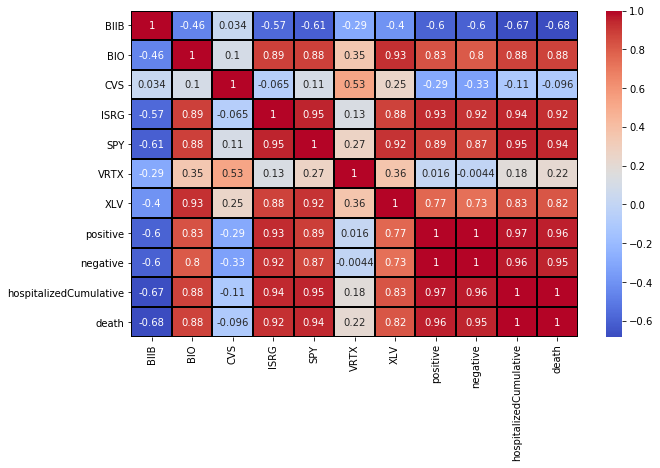

In [96]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(hc_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [97]:
BIIB_beta = beta('BIIB','SPY',7,hc_march_df)
BIO_beta = beta('BIO','SPY',7,hc_march_df)
CVS_beta = beta('CVS','SPY',7,hc_march_df)
VRTX_beta = beta('VRTX','SPY',7,hc_march_df)
ISRG_beta = beta('ISRG','SPY',7,hc_march_df)

In [98]:
XLV_beta.hvplot(label = "XLV") * BIIB_beta.hvplot(label = "BIIB") * BIO_beta.hvplot(label = "BIO") * CVS_beta.hvplot(label = "CVS") * VRTX_beta.hvplot(label = "VRTX") * ISRG_beta.hvplot(label = "ISRG")

:Overlay
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.BIIB :Curve   [index]   (0)
   .Curve.BIO  :Curve   [index]   (0)
   .Curve.CVS  :Curve   [index]   (0)
   .Curve.VRTX :Curve   [index]   (0)
   .Curve.ISRG :Curve   [index]   (0)

In [99]:
BIIB_beta = beta('BIIB','SPY',7,hc_fromapril_df)
BIO_beta = beta('BIO','SPY',7,hc_fromapril_df)
CVS_beta = beta('CVS','SPY',7,hc_fromapril_df)
VRTX_beta = beta('VRTX','SPY',7,hc_fromapril_df)
ISRG_beta = beta('ISRG','SPY',7,hc_fromapril_df)

In [100]:
XLV_beta.hvplot(label = "XLV") * BIIB_beta.hvplot(label = "BIIB") * BIO_beta.hvplot(label = "BIO") * CVS_beta.hvplot(label = "CVS") * VRTX_beta.hvplot(label = "VRTX") * ISRG_beta.hvplot(label = "ISRG")

:Overlay
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.BIIB :Curve   [index]   (0)
   .Curve.BIO  :Curve   [index]   (0)
   .Curve.CVS  :Curve   [index]   (0)
   .Curve.VRTX :Curve   [index]   (0)
   .Curve.ISRG :Curve   [index]   (0)

In [101]:
hc_march_df.std()

BIIB                          18.049357
BIO                           19.622886
CVS                            4.199344
ISRG                          65.245756
SPY                           27.396816
VRTX                          12.379194
XLV                            7.086184
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [102]:
hc_fromapril_df.std()

BIIB                      1.833499e+01
BIO                       4.347211e+01
CVS                       2.991261e+00
ISRG                      8.135782e+01
SPY                       2.424719e+01
VRTX                      1.322883e+01
XLV                       4.447056e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Consumer Discretionary

In [103]:
cd_df = yf.download(['ARD','MGM','EBAY','MCD','ROST','SPY','XLY'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
cd_df = cd_df['Close']
cd_march_df = pd.concat([cd_df,march_df], axis = "columns")
cd_march_df.head()

ARD       EBAY         MCD        MGM        ROST  \
2020-03-02  18.100000  35.959999  202.550003  25.049999  111.980003   
2020-03-03  18.040001  36.720001  199.509995  23.299999  109.220001   
2020-03-04  18.830000  38.490002  207.020004  23.299999  109.559998   
2020-03-05  18.250000  37.220001  198.320007  20.600000  101.690002   
2020-03-06  17.049999  36.389999  198.860001  20.389999  102.510002   

                   SPY         XLY  positive  negative  \
2020-03-02  309.089996  119.809998       NaN       NaN   
2020-03-03  300.239990  116.910004       NaN       NaN   
2020-03-04  312.859985  120.949997     281.0    1417.0   
2020-03-05  302.459991  116.440002     388.0    1949.0   
2020-03-06  297.459991  114.650002     500.0    2672.0   

            hospitalizedCumulative  death  
2020-03-02                     NaN    NaN  
2020-03-03                     NaN    NaN  
2020-03-04                     4.0   16.0  
2020-03-05                     5.0   20.0  
2020-03-06                     6.0   26.0

In [104]:
cd_df = yf.download(['ARD','MGM','EBAY','MCD','ROST','SPY','XLY'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
cd_df = cd_df['Close']
cd_fromapril_df = pd.concat([cd_df,from_april], axis = "columns")
cd_fromapril_df.head()

ARD       EBAY         MCD    MGM       ROST         SPY  \
2020-04-01  11.47  28.780001  158.169998  11.77  81.089996  246.149994   
2020-04-02  11.12  29.190001  161.500000  11.51  79.400002  251.830002   
2020-04-03  10.77  29.410000  160.330002  10.58  74.750000  248.190002   
2020-04-04    NaN        NaN         NaN    NaN        NaN         NaN   
2020-04-05    NaN        NaN         NaN    NaN        NaN         NaN   

                  XLY  positive  negative  hospitalizedCumulative    death  
2020-04-01  93.699997    224086    984489                 27953.0   5324.0  
2020-04-02  94.050003    252146   1075547                 32128.0   6496.0  
2020-04-03  92.410004    284222   1176560                 36682.0   7782.0  
2020-04-04        NaN    317434   1372626                 41768.0   9264.0  
2020-04-05        NaN    342934   1466925                 45671.0  10604.0

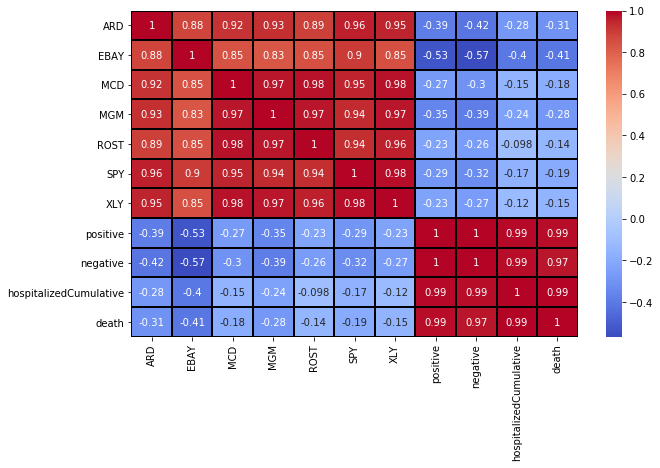

In [105]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cd_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

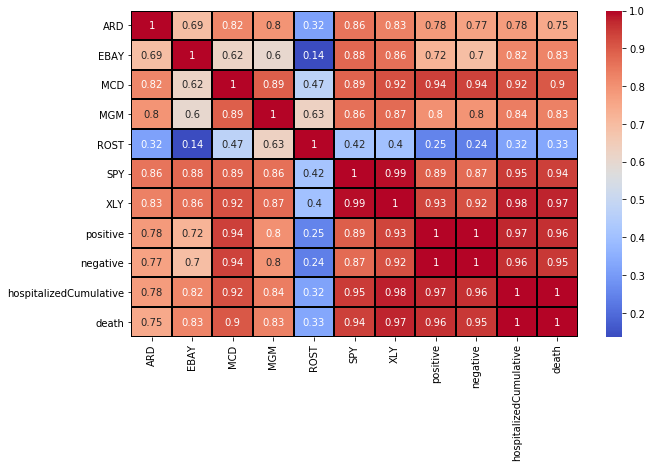

In [106]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cd_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [107]:
ARD_beta = beta('ARD','SPY',7,cd_march_df)
MGM_beta = beta('MGM','SPY',7,cd_march_df)
EBAY_beta = beta('EBAY','SPY',7,cd_march_df)
MCD_beta = beta('MCD','SPY',7,cd_march_df)
ROST_beta = beta('ROST','SPY',7,cd_march_df)

In [108]:
XLY_beta.hvplot(label = "XLY") * ARD_beta.hvplot(label = "ARD") * MGM_beta.hvplot(label = "MGM") * EBAY_beta.hvplot(label = "EBAY") * ROST_beta.hvplot(label = "ROST") * MCD_beta.hvplot(label = "MCD")

:Overlay
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.ARD  :Curve   [index]   (0)
   .Curve.MGM  :Curve   [index]   (0)
   .Curve.EBAY :Curve   [index]   (0)
   .Curve.ROST :Curve   [index]   (0)
   .Curve.MCD  :Curve   [index]   (0)

In [109]:
ARD_beta = beta('ARD','SPY',7,cd_fromapril_df)
MGM_beta = beta('MGM','SPY',7,cd_fromapril_df)
EBAY_beta = beta('EBAY','SPY',7,cd_fromapril_df)
MCD_beta = beta('MCD','SPY',7,cd_fromapril_df)
ROST_beta = beta('ROST','SPY',7,cd_fromapril_df)

In [110]:
XLY_beta.hvplot(label = "XLY") * ARD_beta.hvplot(label = "ARD") * MGM_beta.hvplot(label = "MGM") * EBAY_beta.hvplot(label = "EBAY") * ROST_beta.hvplot(label = "ROST") * MCD_beta.hvplot(label = "MCD")

:Overlay
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.ARD  :Curve   [index]   (0)
   .Curve.MGM  :Curve   [index]   (0)
   .Curve.EBAY :Curve   [index]   (0)
   .Curve.ROST :Curve   [index]   (0)
   .Curve.MCD  :Curve   [index]   (0)

In [111]:
cd_march_df.std()

ARD                            2.992419
EBAY                           3.589382
MCD                           22.916896
MGM                            5.574497
ROST                          16.799662
SPY                           27.396816
XLY                           11.323204
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [112]:
cd_fromapril_df.std()

ARD                       1.257420e+00
EBAY                      7.762977e+00
MCD                       1.602304e+01
MGM                       3.375838e+00
ROST                      4.962470e+00
SPY                       2.424719e+01
XLY                       1.480889e+01
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

In [113]:
### Real Estate

In [114]:
re_df = yf.download(['ACLD','AGNC','ADC','ALX','ARE','SPY','XLRE'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
re_df = re_df['Close']
re_march_df = pd.concat([re_df,march_df], axis = "columns")
re_march_df.head()

ACLD        ADC       AGNC         ALX         ARE         SPY  \
2020-03-02  0.08  74.360001  18.150000  309.000000  155.580002  309.089996   
2020-03-03  0.08  74.419998  17.879999  311.000000  157.750000  300.239990   
2020-03-04  0.08  77.650002  18.240000  323.529999  163.440002  312.859985   
2020-03-05  0.08  76.959999  17.700001  313.130005  160.940002  302.459991   
2020-03-06  0.08  76.650002  17.100000  311.119995  159.059998  297.459991   

                 XLRE  positive  negative  hospitalizedCumulative  death  
2020-03-02  38.619999       NaN       NaN                     NaN    NaN  
2020-03-03  38.590000       NaN       NaN                     NaN    NaN  
2020-03-04  40.090000     281.0    1417.0                     4.0   16.0  
2020-03-05  39.169998     388.0    1949.0                     5.0   20.0  
2020-03-06  38.500000     500.0    2672.0                     6.0   26.0

In [115]:
re_df = yf.download(['ACLD','AGNC','ADC','ALX','ARE','SPY','XLRE'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
re_df = re_df['Close']
re_fromapril_df = pd.concat([re_df,from_april], axis = "columns")
re_fromapril_df.head()

ACLD        ADC  AGNC         ALX         ARE         SPY  \
2020-04-01  0.08  60.639999  9.49  258.089996  131.240005  246.149994   
2020-04-02  0.08  60.599998  9.80  262.720001  131.380005  251.830002   
2020-04-03  0.08  57.080002  9.51  265.920013  129.990005  248.190002   
2020-04-04   NaN        NaN   NaN         NaN         NaN         NaN   
2020-04-05   NaN        NaN   NaN         NaN         NaN         NaN   

                 XLRE  positive  negative  hospitalizedCumulative    death  
2020-04-01  29.120001    224086    984489                 27953.0   5324.0  
2020-04-02  29.549999    252146   1075547                 32128.0   6496.0  
2020-04-03  29.299999    284222   1176560                 36682.0   7782.0  
2020-04-04        NaN    317434   1372626                 41768.0   9264.0  
2020-04-05        NaN    342934   1466925                 45671.0  10604.0

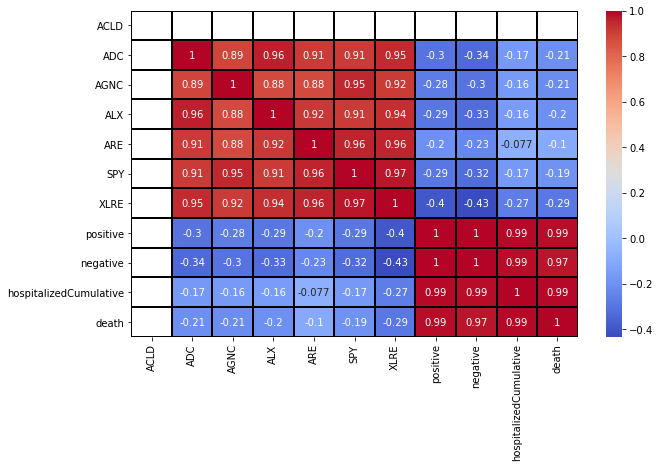

In [116]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(re_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

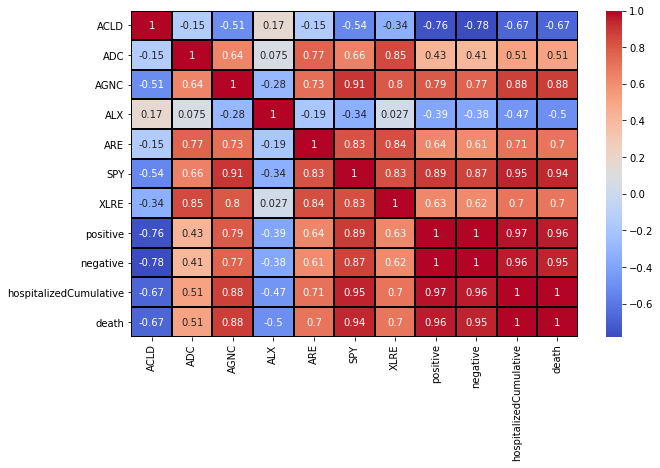

In [117]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(re_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [118]:
ACLD_beta = beta('ACLD','SPY',7,re_march_df)
AGNC_beta = beta('AGNC','SPY',7,re_march_df)
ADC_beta = beta('ADC','SPY',7,re_march_df)
ALX_beta = beta('ALX','SPY',7,re_march_df)
ARE_beta = beta('ARE','SPY',7,re_march_df)

In [119]:
XLRE_beta.hvplot(label = "XLRE") * ACLD_beta.hvplot(label = "ACLD") * AGNC_beta.hvplot(label = "AGNC") * ADC_beta.hvplot(label = "ADC") * ALX_beta.hvplot(label = "ALX") * ARE_beta.hvplot(label = "ARE")

:Overlay
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.ACLD :Curve   [index]   (0)
   .Curve.AGNC :Curve   [index]   (0)
   .Curve.ADC  :Curve   [index]   (0)
   .Curve.ALX  :Curve   [index]   (0)
   .Curve.ARE  :Curve   [index]   (0)

In [120]:
ACLD_beta = beta('ACLD','SPY',7,re_fromapril_df)
AGNC_beta = beta('AGNC','SPY',7,re_fromapril_df)
ADC_beta = beta('ADC','SPY',7,re_fromapril_df)
ALX_beta = beta('ALX','SPY',7,re_fromapril_df)
ARE_beta = beta('ARE','SPY',7,re_fromapril_df)

In [121]:
XLRE_beta.hvplot(label = "XLRE") * ACLD_beta.hvplot(label = "ACLD") * AGNC_beta.hvplot(label = "AGNC") * ADC_beta.hvplot(label = "ADC") * ALX_beta.hvplot(label = "ALX") * ARE_beta.hvplot(label = "ARE")

:Overlay
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.ACLD :Curve   [index]   (0)
   .Curve.AGNC :Curve   [index]   (0)
   .Curve.ADC  :Curve   [index]   (0)
   .Curve.ALX  :Curve   [index]   (0)
   .Curve.ARE  :Curve   [index]   (0)

In [122]:
re_march_df.std()

ACLD                           0.000000
ADC                            9.581859
AGNC                           2.987741
ALX                           25.631124
ARE                           13.958357
SPY                           27.396816
XLRE                           4.529851
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [123]:
re_fromapril_df.std()

ACLD                      2.486876e-02
ADC                       2.730871e+00
AGNC                      9.764494e-01
ALX                       1.841276e+01
ARE                       1.023095e+01
SPY                       2.424719e+01
XLRE                      1.710576e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64

### Utilities

In [124]:
utilities_df = yf.download(['NRG','SRE','PPL','AWK','BIP','SPY','XLU'],
                      start='2020-03-01',
                      end='2020-03-31',
                      progress=False)
utilities_df = utilities_df['Close']
utilities_march_df = pd.concat([utilities_df,march_df], axis = "columns")
utilities_march_df.head()

AWK        BIP        NRG        PPL         SPY  \
2020-03-02  130.839996  46.517857  34.169998  31.809999  309.089996   
2020-03-03  131.419998  46.732143  33.299999  31.040001  300.239990   
2020-03-04  140.309998  47.669643  35.450001  32.180000  312.859985   
2020-03-05  139.360001  47.258930  34.349998  31.680000  302.459991   
2020-03-06  141.000000  47.098213  34.320000  31.510000  297.459991   

                   SRE        XLU  positive  negative  hospitalizedCumulative  \
2020-03-02  142.229996  65.839996       NaN       NaN                     NaN   
2020-03-03  141.020004  65.029999       NaN       NaN                     NaN   
2020-03-04  147.839996  68.720001     281.0    1417.0                     4.0   
2020-03-05  141.759995  67.660004     388.0    1949.0                     5.0   
2020-03-06  141.869995  67.110001     500.0    2672.0                     6.0   

            death  
2020-03-02    NaN  
2020-03-03    NaN  
2020-03-04   16.0  
2020-03-05   20.0  
2020-03-06   26.0

In [125]:
utilities_df = yf.download(['NRG','SRE','PPL','AWK','BIP','SPY','XLU'],
                      start='2020-04-01',
                      end='2020-12-31',
                      progress=False)
utilities_df = utilities_df['Close']
utilities_fromapril_df = pd.concat([utilities_df,from_april], axis = "columns")
utilities_fromapril_df.head()

AWK        BIP        NRG        PPL         SPY  \
2020-04-01  112.800003  34.389999  26.840000  22.900000  246.149994   
2020-04-02  117.639999  36.580002  27.790001  22.969999  251.830002   
2020-04-03  113.320000  35.400002  26.209999  21.770000  248.190002   
2020-04-04         NaN        NaN        NaN        NaN         NaN   
2020-04-05         NaN        NaN        NaN        NaN         NaN   

                   SRE        XLU  positive  negative  hospitalizedCumulative  \
2020-04-01  103.709999  52.080002    224086    984489                 27953.0   
2020-04-02  106.260002  53.709999    252146   1075547                 32128.0   
2020-04-03  104.279999  51.790001    284222   1176560                 36682.0   
2020-04-04         NaN        NaN    317434   1372626                 41768.0   
2020-04-05         NaN        NaN    342934   1466925                 45671.0   

              death  
2020-04-01   5324.0  
2020-04-02   6496.0  
2020-04-03   7782.0  
2020-04-04   9264.0  
2020-04-05  10604.0

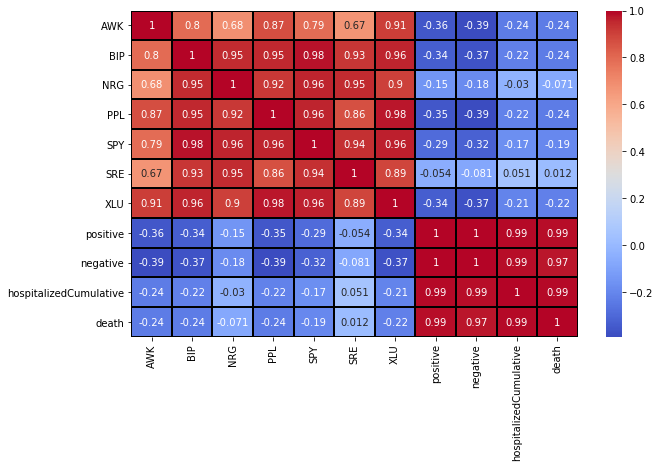

In [126]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(utilities_march_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

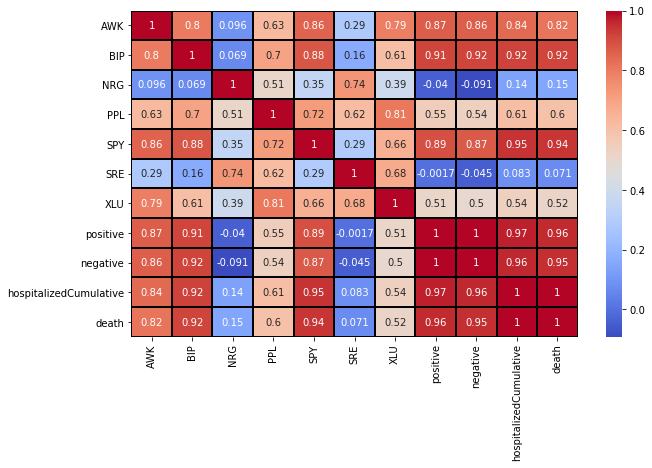

In [127]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(utilities_fromapril_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [128]:
NRG_beta = beta('NRG','SPY',7,utilities_march_df)
SRE_beta = beta('SRE','SPY',7,utilities_march_df)
PPL_beta = beta('PPL','SPY',7,utilities_march_df)
AWK_beta = beta('AWK','SPY',7,utilities_march_df)
BIP_beta = beta('BIP','SPY',7,utilities_march_df)

In [129]:
XLU_beta.hvplot(label = "XLU") * NRG_beta.hvplot(label = "NRG") * SRE_beta.hvplot(label = "SRE") * PPL_beta.hvplot(label = "PPL") * AWK_beta.hvplot(label = "AWK") * BIP_beta.hvplot(label = "BIP")

:Overlay
   .Curve.XLU :Curve   [Date]   (0)
   .Curve.NRG :Curve   [index]   (0)
   .Curve.SRE :Curve   [index]   (0)
   .Curve.PPL :Curve   [index]   (0)
   .Curve.AWK :Curve   [index]   (0)
   .Curve.BIP :Curve   [index]   (0)

In [130]:
NRG_beta = beta('NRG','SPY',7,utilities_fromapril_df)
SRE_beta = beta('SRE','SPY',7,utilities_fromapril_df)
PPL_beta = beta('PPL','SPY',7,utilities_fromapril_df)
AWK_beta = beta('AWK','SPY',7,utilities_fromapril_df)
BIP_beta = beta('BIP','SPY',7,utilities_fromapril_df)

In [131]:
XLU_beta.hvplot(label = "XLU") * NRG_beta.hvplot(label = "NRG") * SRE_beta.hvplot(label = "SRE") * PPL_beta.hvplot(label = "PPL") * AWK_beta.hvplot(label = "AWK") * BIP_beta.hvplot(label = "BIP")

:Overlay
   .Curve.XLU :Curve   [Date]   (0)
   .Curve.NRG :Curve   [index]   (0)
   .Curve.SRE :Curve   [index]   (0)
   .Curve.PPL :Curve   [index]   (0)
   .Curve.AWK :Curve   [index]   (0)
   .Curve.BIP :Curve   [index]   (0)

In [132]:
utilities_march_df.std()

AWK                           13.383857
BIP                            7.070184
NRG                            4.336656
PPL                            4.272092
SPY                           27.396816
SRE                           18.361589
XLU                            7.007431
positive                   58997.956145
negative                  277915.865540
hospitalizedCumulative      6948.578157
death                       1157.394533
dtype: float64

In [133]:
utilities_fromapril_df.std()

AWK                       1.064868e+01
BIP                       3.148223e+00
NRG                       2.252198e+00
PPL                       1.539570e+00
SPY                       2.424719e+01
SRE                       5.346505e+00
XLU                       2.113633e+00
positive                  2.267849e+06
negative                  3.073983e+07
hospitalizedCumulative    1.089614e+05
death                     5.394863e+04
dtype: float64